## Importing tools

In [12]:
# data manipulation tools
import numpy as np
import pandas as pd
pd.set_option("display.precision", 11) # setting the precison for energies

# data visualization tool
from matplotlib import pyplot as plt

# system tools
import glob
import os

## Creating functions

### Old Functions

In [499]:
def extract (file_type, word):
    '''extract (file_type, word): 
        1) Takes an input string (file_type) extention i. e. '.out' and transforms it in .txt
        2) Finds a word/expression (word) in a list of .txt file and returns it into a new file
        input word = 'LATTICE PARAMETERS' for extracting a, b and c
        input word = 'OPT END' for extracting energies
        input word = anything for other text extractions'''
    
    original_files = os.listdir('.')
    files_interest = [s for s in original_files if (file_type  in s)]
    filenames = glob.glob('*'+file_type)
    
    
    if not files_interest:
        new_files = glob.glob('*.txt')
        
        if word in ['LATTICE PARAMETERS']:
            file_object = open('lattice_parameters.csv','a')

            for file in new_files:
                pd.set_option("display.max_colwidth", None)

                df = pd.read_csv(file, sep='delimiter', header=None, engine='python') 

                df2 = df[df[0].str.contains(word)]
                index = df2.index[-1]
                #print(df)
                #list_index = df.index
                #print(df2)
                #print(index)

                anwser = [df.iloc[index:index+4]]
                print('answer = '+ file + str(anwser))
                file_object.write(str(file) + str(anwser) + '\n\n\n')

            file_object.close()     

        elif word in ['OPT END']:
            file_object = open('energies.csv','a')

            for file in new_files:
                pd.set_option("display.max_colwidth", None)

                df = pd.read_csv(file, sep='delimiter', header=None, engine='python') 

                df2 = df[df[0].str.contains(word)]
                index = df2.index[-1]
                #print(df)
                #list_index = df.index
                #print(df2)
                #print(index)

                anwser = [df.iloc[index:index+1]]
                print('answer = '+ file + str(anwser))
                file_object.write(str(file) + str(anwser) + '\n\n\n')

            file_object.close() 
        else:
            file_object = open('parameters.csv','a')

            for file in new_files:
                pd.set_option("display.max_colwidth", None)

                df = pd.read_csv(file, sep='delimiter', header=None, engine='python') 

                df2 = df[df[0].str.contains(word)]
                index = df2.index[-1]
                #print(df)
                #list_index = df.index
                #print(df2)
                #print(index)

                anwser = [df.iloc[index:index+1]]
                print('answer = '+ file + str(anwser))
                file_object.write(str(file) + str(anwser) + '\n\n\n')

    
    if files_interest:
        for file in filenames:
            base = os.path.splitext(file)[0]
            os.rename(file, base + ".txt")
            new_files = glob.glob('*.txt')
                
        if word in ['LATTICE PARAMETERS']:
            file_object = open('lattice_parameters.csv','a')

            for file in new_files:
                pd.set_option("display.max_colwidth", None)

                df = pd.read_csv(file, sep='delimiter', header=None, engine='python') 

                df2 = df[df[0].str.contains(word)]
                index = df2.index[-1]
                #print(df)
                #list_index = df.index
                #print(df2)
                #print(index)

                anwser = [df.iloc[index:index+4]]
                print('answer = '+ file + str(anwser))
                file_object.write(str(file) + str(anwser) + '\n\n\n')

            file_object.close()     

        elif word in ['OPT END']:
            file_object = open('energies.csv','a')

            for file in new_files:
                pd.set_option("display.max_colwidth", None)

                df = pd.read_csv(file, sep='delimiter', header=None, engine='python') 

                df2 = df[df[0].str.contains(word)]
                index = df2.index[-1]
                #print(df)
                #list_index = df.index
                #print(df2)
                #print(index)

                anwser = [df.iloc[index:index+1]]
                print('answer = '+ file + str(anwser))
                file_object.write(str(file) + str(anwser) + '\n\n\n')

            file_object.close() 
        else:
            file_object = open('parameters.csv','a')

            for file in new_files:
                pd.set_option("display.max_colwidth", None)

                df = pd.read_csv(file, sep='delimiter', header=None, engine='python') 

                df2 = df[df[0].str.contains(word)]
                index = df2.index[-1]
                #print(df)
                #list_index = df.index
                #print(df2)
                #print(index)

                anwser = [df.iloc[index:index+1]]
                print('answer = '+ file + str(anwser))
                file_object.write(str(file) + str(anwser) + '\n\n\n')


### New working functions

In [2]:
def trans_ext (file_type):
    '''Takes an input string extention i. e. '*.out' or '*.o' and transforms it in .txt'''
    
    filenames = glob.glob(file_type)
    for file in filenames:
        base = os.path.splitext(file)[0]
        os.rename(file, base + ".txt")
    return filenames   

In [3]:
def complex_text_to_df (beginning_text, end_text, column_names):
    """Extracts a dataframe like text from a complex text file and put into pandas dataframe form. 
                       It is meant to be used to extract the text tables inside the Infrared output file of Crystal Code.
        1) Takes two input strings (beginning_text, end_text), which relates to the first and last lines used 
           as references to find the beginning and end of the dataframe text inside the text output file
        2) Takes a dictionary input (column_names), that assigns each column (1 to 7) to its name
    """

    # opens the file to extract the first and last indexes of the dataframe text
    with open(file, 'r') as f:
        # getting indexes and lines from the document
        for i, line in enumerate(f):
            # finding the beginning of the dataframe I want inside f (file being read)
            if beginning_text in line:
                # stores the index value of the first line of interest inside a new variable
                beginning = i
            # to find the end of the dataframe inside the text, a reference phrase is this one:    
            if end_text in line:
                # stores the index value of the last line of interest inside a new variable
                end = i
    # reopens the file to extract the indexes between the first and last lines of the dataframe text inside f
    with open(file, 'r') as f:
        # A dictionary to store indexes (keys) and the dataframe lines (values)
        d = {}
        for j, line2 in enumerate(f):
            if beginning <= j < end-1:
                d[j] = line2
            else:
                continue

    # converts the dictionary d into dataframe
    df = pd.DataFrame(data=d, index=['test'])
    df = df.T # puts into columns
    df = df.loc[beginning+2:] # removes first line with undesired text
    serie = df['test'].str.replace("(","") # cleans the strings
    serie = serie.str.replace(")","") # cleans the strings
    serie = serie.str.replace("\n","") # cleans the strings
    df = serie.str.split(expand=True) # splt the one columns with multiple strings into many columns with one each value
    df = df.drop(0, axis=1) # drop doubled mode column
    df = df.drop(8, axis=1) # drop Raman active column (TO modes) and Shifts in THz (LO modes)

    # rename the column titles
    df = df.rename(columns=column_names)
    
    df = df.drop(df.tail(1).index) # drop the last row because it has 'none' values
    return df

In [4]:
def complex_txt_to_df_no_shifts ():
    """complex_txt_to_df_no_shifts():
    - Description: extracts a dataframe like text from a complex text file and put into pandas dataframe form. 
                   It is meant to be used to extract the text tables inside the Infrared output file of Crystal Code.
                   Exclusive use for the case in which Longitudinal Phonon Modes cannot be obtained by symmetry.
                   Takes no inputs - to be used exclusively inside the for loop
    """
    # opens the file to extract the first and last indexes of the dataframe text
    with open(file, 'r') as f:
        # getting indexes and lines from the document
        for i, line in enumerate(f):    
            if beginning_text_no_shifts in line:
#                     print("je suis la aussi")
                # stores the index value of the first line of interest inside a new variable
                beginning = i+11 # where the tabular actually begins
            # to find the end of the dataframe inside the text, a reference phrase is this one:    
            if end_text in line:
                # stores the index value of the last line of interest inside a new variable
                end = i
    with open(file, 'r') as f:
        # A dictionary to store indexes (keys) and the dataframe lines (values)
        d = {}
        for j, line2 in enumerate(f):
            if beginning <= j < end-1:
    #             print("j is ", j)
    #             print("line is ", line2)
                d[j] = line2
            else:
                continue
    # converts the dictionary d into dataframe
    df = pd.DataFrame(data=d, index=['test'])
    df = df.T # puts into columns
    # df = df.loc[beginning+2:] # removes first line with undesired text
    serie = df['test'].str.replace("(","") # cleans the strings
    serie = serie.str.replace(")","") # cleans the strings
    serie = serie.str.replace("\n","") # cleans the strings
    df = serie.str.split(expand=True) # splt the one columns with multiple strings into many columns with one each value
    df = df.drop(0, axis=1) # drop doubled mode column
    df = df.drop(8, axis=1) # drop Raman active column (TO modes) and Shifts in THz (LO modes)
    df = df.drop(9, axis=1) # drop Raman active column (TO modes) and Shifts in THz (LO modes)
    # rename the column titles
    df = df.rename(columns=column_names)
    df = df.reset_index()
    # df = df.drop(df.tail(1).index) # drop the last row because it has 'none' values
    # df[df.isna()]
    # print(df["MODE"].loc[df["MODE"].isna()].iloc[0])
    end_index = df["MODE"][df["MODE"].isna()].index[0]

    # df.loc[~df.isnull().sum(1).astype(bool)].iloc[0]

    df = df.iloc[0:end_index, :]
    return df

In [5]:
def extract_params ():    
    # reading the whole document
    with open(file) as f:
        #save all words into one single list, each word has a different index, helps to assemble them together after
        flat_list=[word for line in f for word in line.split()]
    # iterate over the list to find the words desired    
    for idx, x in enumerate(flat_list):
        # first desired phrase is: LATTICE PARAMETERS  (ANGSTROMS AND DEGREES) - PRIMITIVE CELL
        if flat_list[idx]=='CELL' and flat_list[idx-1]== 'PRIMITIVE' and flat_list[idx-2]== '-' and flat_list[idx-3]== 'DEGREES)':
            # saves the information from the list into a dictionary 
            lat_params = {'A': flat_list[idx+8],      'B': flat_list[idx+9],     'C': flat_list[idx+10],
                         'ALPHA': flat_list[idx+11], 'BETA': flat_list[idx+12], 'GAMMA': flat_list[idx+13],
                         'VOLUME': flat_list[idx+14]}
            #converts into a structured dataframe
            df_lat_params = pd.DataFrame(data=lat_params, index=[1])
            #converts the strings into float64 because they are numbers
            df_lat_params = pd.to_numeric(df_lat_params.iloc[0], errors='ignore')
            
        # Second phrase : ATOMS IN THE ASYMMETRIC UNIT   12 - ATOMS IN THE UNIT CELL:   24    
        if flat_list[idx]=='CELL:' and flat_list[idx-1]== 'UNIT' and flat_list[idx-2]== 'THE' and flat_list[idx-3]== 'IN':
            # saves the number into a dictionary 
            atoms_cell = {'ATOMS IN THE ASYMMETRIC UNIT': flat_list[idx-6], 'ATOMS IN THE UNIT CELL': flat_list[idx+1]}
            continue
            
        # Third phrase : 'SUM TENSOR OF THE VIBRATIONAL CONTRIBUTIONS TO THE' STATIC DIELECTRIC     TENSOR'    
        if flat_list[idx]=='TENSOR' and flat_list[idx-1]=='DIELECTRIC' and flat_list[idx-2]=='STATIC' and flat_list[idx-10]=='SUM':
            #converts the matrix of sum tensor of vibratinal contribution into a structured dataframe
            df_vib_cont_stat_diel_tensor = pd.DataFrame(np.array([[flat_list[idx+1], flat_list[idx+2], flat_list[idx+3]], 
                                   [flat_list[idx+4], flat_list[idx+5], flat_list[idx+6]], 
                                   [flat_list[idx+7], flat_list[idx+8], flat_list[idx+9]]]), columns=['x', 'y', 'z']) 

        # Forth phrase :  HIGH FREQUENCY DIELECTRIC     TENSOR (FROM INPUT)
        if flat_list[idx]=='INPUT)' and flat_list[idx-1]=='(FROM' and flat_list[idx-2]=='TENSOR' and flat_list[idx-3]=='DIELECTRIC':
            #converts the matrix of high freq dieletric into a structured dataframe
            df_high_freq_diel_tensor = pd.DataFrame(np.array([[flat_list[idx+1], flat_list[idx+2], flat_list[idx+3]], 
                                   [flat_list[idx+4], flat_list[idx+5], flat_list[idx+6]], 
                                   [flat_list[idx+7], flat_list[idx+8], flat_list[idx+9]]]), columns=['x', 'y', 'z']) 
            
        # Fifth phrase :   STATIC DIELECTRIC     TENSOR
        if any(char.isdigit() for char in flat_list[idx])==True and flat_list[idx-1]=='TENSOR' and flat_list[idx-2]=='DIELECTRIC' and flat_list[idx-3]=='STATIC' and any(char.isdigit() for char in flat_list[idx-4])==True:                                           
            #converts the matrix of static dieletric values into a structured dataframe
            df_stat_diel_tensor = pd.DataFrame(np.array([ [flat_list[idx], flat_list[idx+1], flat_list[idx+2]], 
                                   [flat_list[idx+3], flat_list[idx+4], flat_list[idx+5]], 
                                   [flat_list[idx+6], flat_list[idx+7], flat_list[idx+8]]]), columns=['x', 'y', 'z'])
            
    return df_lat_params, atoms_cell, df_vib_cont_stat_diel_tensor, df_high_freq_diel_tensor, df_stat_diel_tensor

## Converting Files Extentions

In [900]:
# filenames_HZO112 = glob.glob('HZO_112/*.o')
# # filenames_HZO211
# for file in filenames_HZO112:
#     base = os.path.splitext(file)[0]
#     os.rename(file, base + ".txt")

In [5]:
# filenames_HZO121 = glob.glob('HZO_121/*.o')
# # filenames_HZO211
# for file in filenames_HZO121:
#     base = os.path.splitext(file)[0]
#     os.rename(file, base + ".txt")

## HZO 211 

### Reading and extracting text from file

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Creating a script to be able to read the output text files of Crystal's IR DFT calculations
# choose which kind of extention to use/read
# if conversion is needed, use function trans_text annexed
file_type = '.txt'

# gives a list of files with the chosen extention inside the current folder
filenames = glob.glob('*'+file_type)

# initialize an empty dict to add the params for each file inside
all_configs = {}

#for each output file to be read inside the folder
for file in filenames:
    print(file)
    ### Extracting the Physical Parameters Simulated ###
    # using extract_params() function to find the desired text and transform it to dataframe or dictinary (atoms_cell)
    df_lat_params, atoms_cell, df_vib_cont_tensor, df_high_freq_diel_tensor, df_stat_diel_tensor = extract_params()
    
    ### Extracting Transversal Optical Modes Simulated ###
    # using function complex_text_to_df() to find the phrase desired in a line which is used as reference for the beginning of
    # the tabular dataframe text. then finds the ending text in a last line to repare the end of the dataframe text
    df_modes_TO = complex_text_to_df(beginning_text = "MODES         EIGV          FREQUENCIES     IRREP  IR   INTENS    RAMAN",
                   end_text = " TRANSVERSE OPTICAL COMBINATION MODES AND OVERTONES.",
                  column_names={1: 'MODE', 2: 'EIGV (Hartree**2)', 3: 'FREQ (cm-1)', 4:'FREQ (THz)', 
                             5:'IRREP', 6:'IR', 7:'INTENS (km/mol)'})

    ### Extracting Longitudinal Optical Modes ###
    # two cases: simulated by symmetry (with LO-TO shifts) or not (no shifts)
    # needs two different repare initial phrases
    beginning_text_SHIFTS = "MODES         EIGV          FREQUENCIES    IRREP IR INTENS       SHIFTS"
    beginning_text_no_shifts = "LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED"
    
    with open(file, 'r') as f:
        # getting indexes and lines from the document
        for i, line in enumerate(f):
            # finding the beginning of the dataframe I want inside f (file being read)
            if beginning_text_SHIFTS in line:
                #if shift is present, extract dataframe using complex_text_to_df
                df_modes_LO = complex_text_to_df(beginning_text = "MODES         EIGV          FREQUENCIES    IRREP IR INTENS       SHIFTS",
                       end_text = " ENTRIES ARE FRQS IN CM**-1",
                       column_names={1: 'MODE', 2: 'EIGV (Hartree**2)', 3: 'FREQ (cm-1)', 4:'FREQ (THz)',
                                     5:'IRREP', 6:'INTENS (km/mol)', 7:'LO-TO SHIFTS (cm-1)'})
            # for the second case, a different reparing phrase is used
            if beginning_text_no_shifts  in line:
                print("no shift", file, line)
                end_text = " FREQ(CM**-1)      0.00      0.00      0.00"
                # preparing the column names for the dataframe    
                column_names={1: 'MODE', 2: 'EIGV (Hartree**2)', 3: 'FREQ (cm-1)', 4:'FREQ (THz)',
                                     5:'IRREP', 6: 'IR', 7:'INTENS (km/mol)'}
                #using the complex_txt_to_df_no_shifts () to find and convert the tabular text into dataframe
                df_modes_LO = complex_txt_to_df_no_shifts ()

                # saving all data into a dictionary
            dic = {'lat_params': df_lat_params, 
                   "atoms_cell": atoms_cell, 
                   "df_vib_cont_tensor": df_vib_cont_tensor, 
                   "df_high_freq_diel_tensor": df_high_freq_diel_tensor, 
                   "df_stat_diel_tensor": df_stat_diel_tensor, 
                   "df_modes_TO": df_modes_TO, 
                   "df_modes_LO": df_modes_LO}
    
    # each file will have its own dictionary of parameters inside a final dictionary called all_configs
    all_configs[file[:9]] = dic
    

# all_configs

HZO_211_A_OPTGEOM-1789840.txt
HZO_211_B_OPTGEOM-2117817.txt
no shift HZO_211_B_OPTGEOM-2117817.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_211_C_OPTGEOM-2133928.txt
no shift HZO_211_C_OPTGEOM-2133928.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_211_D_OPTGEOM-2133929.txt
no shift HZO_211_D_OPTGEOM-2133929.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_211_E_OPTGEOM-1789852.txt
HZO_211_F_OPTGEOM-2133930.txt
no shift HZO_211_F_OPTGEOM-2133930.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_211_G_OPTGEOM-2133932.txt
no shift HZO_211_G_OPTGEOM-2133932.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_211_H_OPTGEOM-1789854.txt
HZO_211_I_OPTGEOM-1789855.txt
HZO_211_J_OPTGEOM-1789856.txt
HZO_211_K_OPTGEOM-2117857.txt
no shift HZO_211_K_OPTGEOM-2117857.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

### Analysing the extracted params

#### Exploring

In [46]:
file = "HZO_211_B_OPTGEOM-2117817.txt"
df_lat_params, atoms_cell, df_vib_cont_tensor, df_high_freq_diel_tensor, df_stat_diel_tensor = extract_params()

print(df_lat_params, atoms_cell, df_vib_cont_tensor, df_high_freq_diel_tensor, df_stat_diel_tensor)

A          10.494730
B           5.049130
C           5.069270
ALPHA      89.856540
BETA       89.996760
GAMMA      90.001080
VOLUME    268.616326
Name: 1, dtype: float64 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'}           x         y         z
0  14.54731   0.08715   0.02048
1   0.08715  18.68399   0.09149
2   0.02048   0.09149  18.83454          x        y        z
0  4.43844  0.00000  0.00000
1  0.00000  4.66041  0.00000
2  0.00000  0.00000  4.47563           x         y         z
0  18.98575   0.08715   0.02048
1   0.08715  23.34440   0.09149
2   0.02048   0.09149  23.31017


In [893]:
all_configs.keys()

dict_keys(['HZO_211_A', 'HZO_211_B', 'HZO_211_C', 'HZO_211_D', 'HZO_211_E', 'HZO_211_F', 'HZO_211_G', 'HZO_211_H', 'HZO_211_I', 'HZO_211_J', 'HZO_211_K', 'HZO_211_L', 'HZO_211_M'])

In [894]:
all_configs['HZO_211_B'].keys()

dict_keys(['lat_params', 'atoms_cell', 'df_vib_cont_tensor', 'df_high_freq_diel_tensor', 'df_stat_diel_tensor', 'df_modes_TO', 'df_modes_LO'])

In [895]:
all_configs['HZO_211_C']['df_vib_cont_tensor']

,x,y,z
0,14.54618,0.08422,0.09022
1,0.08422,18.71275,-0.00963
2,0.09022,-0.00963,18.82719


In [896]:
for key, value in all_configs.items():
    print(key, value)

HZO_211_A {'lat_params': A           5.048500
B          10.496660
C           5.068780
ALPHA      90.000000
BETA       90.005270
GAMMA      90.000000
VOLUME    268.606874
Name: 1, dtype: float64, 'atoms_cell': {'ATOMS IN THE ASYMMETRIC UNIT': '12', 'ATOMS IN THE UNIT CELL': '24'}, 'df_vib_cont_tensor':           x         y         z
0  18.69240  -0.00000   0.02148
1  -0.00000  14.54575  -0.00000
2   0.02148  -0.00000  18.77463, 'df_high_freq_diel_tensor':          x        y        z
0  4.66046  0.00000  0.00000
1  0.00000  4.43461  0.00000
2  0.00000  0.00000  4.47447, 'df_stat_diel_tensor':           x         y         z
0  23.35286  -0.00000   0.02148
1  -0.00000  18.98036  -0.00000
2   0.02148  -0.00000  23.24910, 'df_modes_TO':      MODE EIGV (Hartree**2) FREQ (cm-1) FREQ (THz) IRREP IR INTENS (km/mol)
2070    1        0.1767E-16      0.0000     0.0000    A'  A            0.00
2071    2        0.2964E-16      0.0000     0.0000    A'  A            0.00
2072    3        0.5258E-1

In [897]:
for k in all_configs.keys():
    print(k, '\n', all_configs[k]['df_vib_cont_tensor'], '\n\n')

HZO_211_A 
           x         y         z
0  18.69240  -0.00000   0.02148
1  -0.00000  14.54575  -0.00000
2   0.02148  -0.00000  18.77463 


HZO_211_B 
           x         y         z
0  14.54731   0.08715   0.02048
1   0.08715  18.68399   0.09149
2   0.02048   0.09149  18.83454 


HZO_211_C 
           x         y         z
0  14.54618   0.08422   0.09022
1   0.08422  18.71275  -0.00963
2   0.09022  -0.00963  18.82719 


HZO_211_D 
           x         y         z
0  14.54200   0.00653   0.08994
1   0.00653  18.70932   0.08017
2   0.08994   0.08017  18.83596 


HZO_211_E 
           x         y         z
0  18.70920  -0.00000   0.02032
1  -0.00000  18.73107  -0.00000
2   0.02032  -0.00000  14.56516 


HZO_211_F 
           x         y         z
0  14.55817   0.08842  -0.09095
1   0.08842  18.69494  -0.01122
2  -0.09095  -0.01122  18.84313 


HZO_211_G 
           x         y         z
0  14.54749   0.08547  -0.01270
1   0.08547  18.67892  -0.05739
2  -0.01270  -0.05739  18.83695 



In [53]:
all_configs['HZO_211_A'].keys()

dict_keys(['lat_params', 'atoms_cell', 'df_vib_cont_tensor', 'df_high_freq_diel_tensor', 'df_stat_diel_tensor', 'df_modes_TO', 'df_modes_LO'])

#### Static Dielectric Constant

In [30]:
all_configs_stat_diel = {}
for k in all_configs.keys():
#     print(k, '\n', all_configs[k]['df_stat_diel_tensor'], '\n\n')
    all_configs_stat_diel[k] = all_configs[k]['df_stat_diel_tensor']

In [31]:
np.set_printoptions(suppress=True) #sets numpy print to normal format, non scientific

# makes one ndarray out of the dafaframes to do statistics
array1 = np.array([all_configs_stat_diel['HZO_211_A']])
for k in all_configs_stat_diel.keys():
    if k == 'HZO_211_A':
        continue
    else:
        array1 = np.append(array1, np.array([all_configs_stat_diel[k]]), axis=0)

# Some statistcs        
mean_stat_diel = np.mean(array1.astype(float), axis=0)
median_stat_diel = np.median(array1.astype(float), axis=0)
std_stat_diel = np.std(array1.astype(float), axis=0)
var_stat_diel = np.var(array1.astype(float), axis=0)

print(" mean:\n", mean_stat_diel, "\n\n", "median:\n", median_stat_diel,"\n\n",
      "standard deviation:\n", std_stat_diel, "\n\n", "variance:\n", var_stat_diel)

 mean:
 [[21.21136462  0.02779154 -0.00263462]
 [ 0.02779154 22.7978      0.01300769]
 [-0.00263462  0.01300769 21.62784   ]] 

 median:
 [[21.8381   0.       0.00698]
 [ 0.      23.3444   0.     ]
 [ 0.00698  0.      23.2491 ]] 

 standard deviation:
 [[2.09124017 0.03912842 0.09177013]
 [0.03912842 1.6833172  0.04098569]
 [0.09177013 0.04098569 2.11074693]] 

 variance:
 [[4.37328546 0.00153103 0.00842176]
 [0.00153103 2.8335568  0.00167983]
 [0.00842176 0.00167983 4.45525261]]


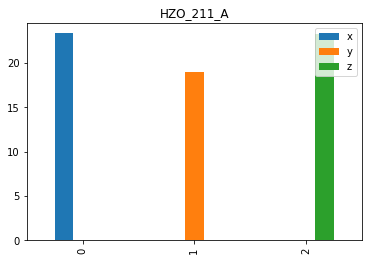

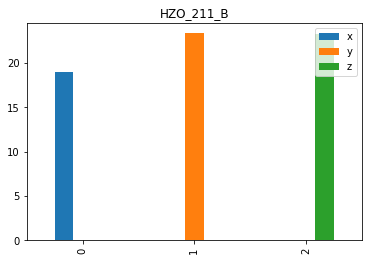

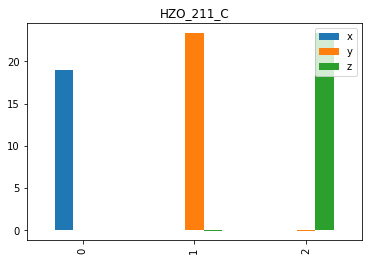

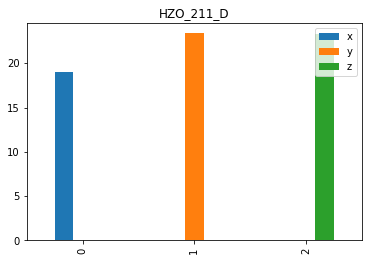

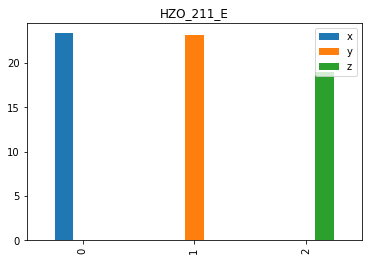

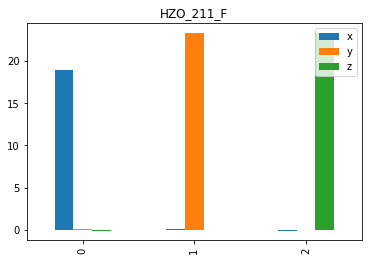

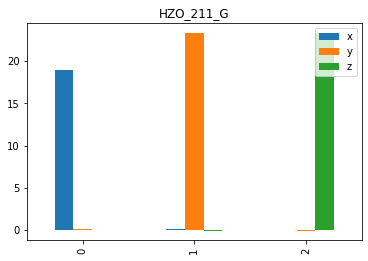

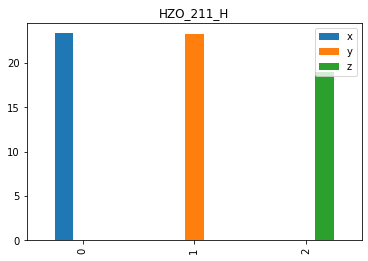

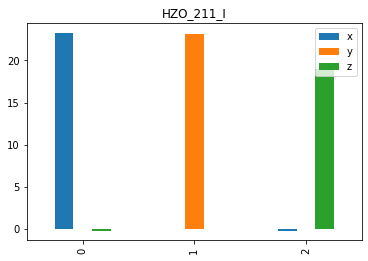

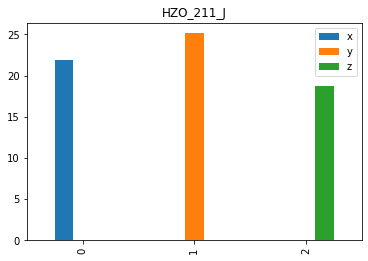

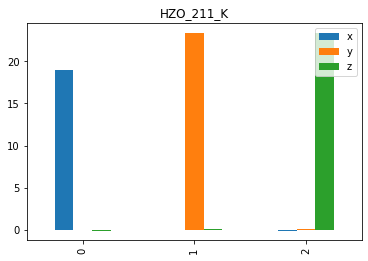

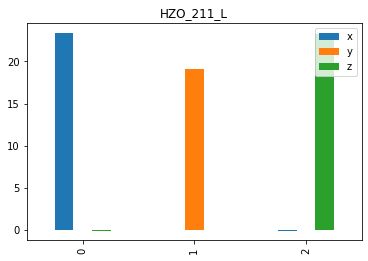

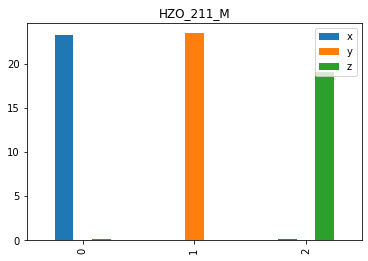

In [32]:
for k in all_configs_stat_diel.keys():
    fig, ax = plt.subplots(facecolor='white')
    all_configs_stat_diel[k].astype(float).plot(kind='bar', ax=ax)
    ax.set_title(k)

#### Transversal Optical Modes

In [57]:
import seaborn as sns

In [58]:
all_configs_TO = {}
for k in all_configs.keys():
#     print(k, '\n', all_configs[k]['df_modes_TO'], '\n\n')
    all_configs_TO[k] = all_configs[k]['df_modes_TO']

In [59]:
all_configs_TO['HZO_211_A'][["MODE", "EIGV (Hartree**2)", "FREQ (cm-1)", 
                             "FREQ (THz)", "INTENS (km/mol)"]] = all_configs_TO['HZO_211_A'][["MODE", "EIGV (Hartree**2)", 
                             "FREQ (cm-1)", "FREQ (THz)", "INTENS (km/mol)"]].astype(float)
all_configs_TO['HZO_211_A']

,MODE,EIGV (Hartree**2),FREQ (cm-1),FREQ (THz),IRREP,IR,INTENS (km/mol)
2070,1.0,1.767000e-17,0.0000,0.0000,A',A,0.00
2071,2.0,2.964000e-17,0.0000,0.0000,A',A,0.00
2072,3.0,5.258000e-17,0.0000,0.0000,"B""",A,0.00
2073,4.0,1.790000e-07,92.8479,2.7835,"B""",A,0.54
2074,5.0,2.026000e-07,98.7900,2.9616,A',A,0.55
...,...,...,...,...,...,...,...
2137,68.0,9.910000e-06,690.9213,20.7133,"B""",A,2.18
2138,69.0,1.026000e-05,702.9718,21.0746,"B""",A,57.25
2139,70.0,1.122000e-05,735.3159,22.0442,A',A,15.73
2140,71.0,1.123000e-05,735.4750,22.0490,"B""",A,6.57


<AxesSubplot:>

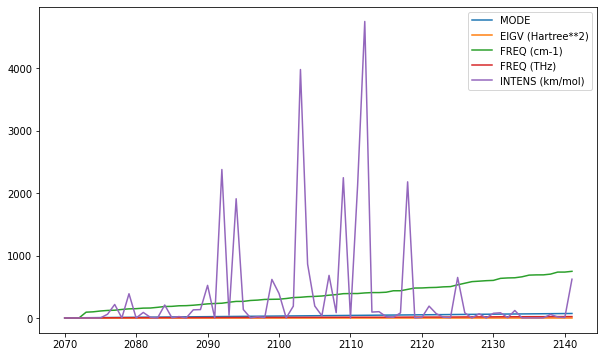

In [60]:
fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(10,6)

all_configs_TO['HZO_211_A'].plot(kind='line', ax=ax)

MODE
EIGV (Hartree**2)
FREQ (cm-1)
FREQ (THz)
INTENS (km/mol)


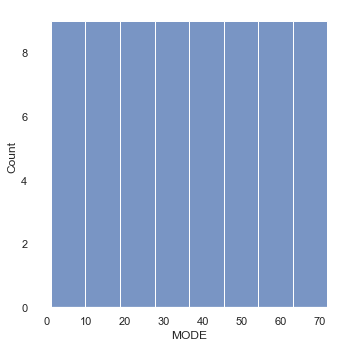

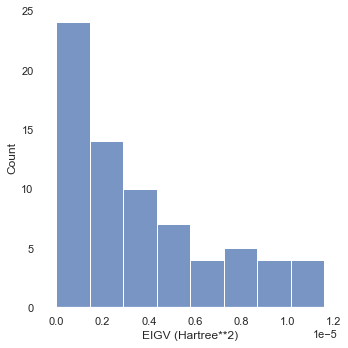

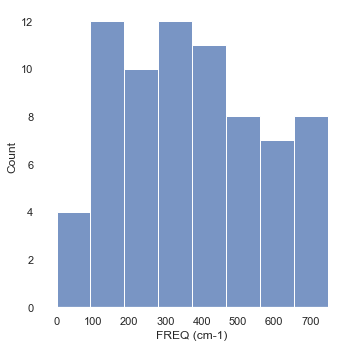

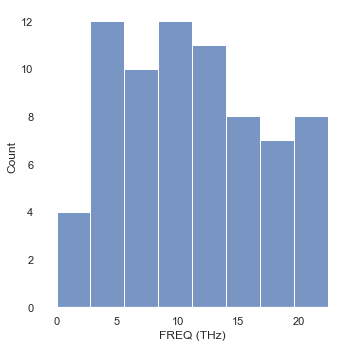

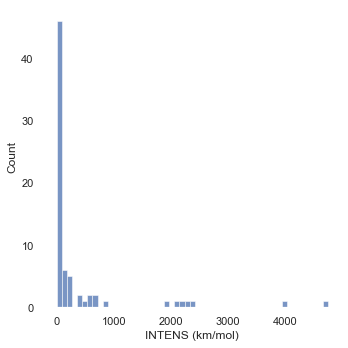

In [61]:
sns.set(rc={'axes.facecolor':'white'})

for col in all_configs_TO['HZO_211_A'].select_dtypes('float'):
    print(col)
    sns.displot(all_configs_TO['HZO_211_A'][col])

In [64]:
np.set_printoptions(suppress=True) #sets numpy print to normal format, non scientific

# makes one ndarray out of the dafaframes to do statistics
array1 = np.array([all_configs_TO['HZO_211_A']])
# print(array1.shape)
for k in all_configs_TO.keys():
    if k == 'HZO_211_A':
        continue
    if len(np.array([all_configs_TO[k]])) != len(array1):
        continue
    else:
#         print((np.array([all_configs_TO[k]])).shape)
#         array1 = np.array([array1, np.array([all_configs_TO[k]])]) 
        array1 = np.append(array1, np.array([all_configs_TO[k]]), axis=0)
print(array1)
# Some statistcs        
mean_stat_diel = np.mean(array1.astype(float), axis=0)
median_stat_diel = np.median(array1.astype(float), axis=0)
std_stat_diel = np.std(array1.astype(float), axis=0)
var_stat_diel = np.var(array1.astype(float), axis=0)

print(" mean:\n", mean_stat_diel, "\n\n", "median:\n", median_stat_diel,"\n\n",
      "standard deviation:\n", std_stat_diel, "\n\n", "variance:\n", var_stat_diel)

[[[1.0 1.767e-17 0.0 ... "A'" 'A' 0.0]
  [2.0 2.964e-17 0.0 ... "A'" 'A' 0.0]
  [3.0 5.258e-17 0.0 ... 'B"' 'A' 0.0]
  ...
  [70.0 1.122e-05 735.3159 ... "A'" 'A' 15.73]
  [71.0 1.123e-05 735.475 ... 'B"' 'A' 6.57]
  [72.0 1.16e-05 747.6348 ... "A'" 'A' 621.12]]

 [['1' '0.2740E-16' '0.0000' ... 'A' 'A' '0.00']
  ['2' '0.9594E-16' '0.0000' ... 'A' 'A' '0.00']
  ['3' '0.1087E-15' '0.0000' ... 'A' 'A' '0.00']
  ...
  ['70' '0.1115E-04' '732.8035' ... 'A' 'A' '8.83']
  ['71' '0.1131E-04' '738.0776' ... 'A' 'A' '1.51']
  ['72' '0.1160E-04' '747.3739' ... 'A' 'A' '613.98']]]


ValueError: could not convert string to float: "A'"

#### Longitudinal Optical Modes

In [746]:
all_configs_stat_diel.keys()

dict_keys(['HZO_211_A', 'HZO_211_B', 'HZO_211_C', 'HZO_211_D', 'HZO_211_E', 'HZO_211_F', 'HZO_211_G', 'HZO_211_H', 'HZO_211_I', 'HZO_211_J', 'HZO_211_K', 'HZO_211_L', 'HZO_211_M'])

#### Number of atoms inside unit cell

In [898]:
all_configs['HZO_211_A'].keys()

dict_keys(['lat_params', 'atoms_cell', 'df_vib_cont_tensor', 'df_high_freq_diel_tensor', 'df_stat_diel_tensor', 'df_modes_TO', 'df_modes_LO'])

In [33]:
for k in all_configs.keys():
    print(k, '\n', all_configs[k]['atoms_cell'], '\n\n')

HZO_211_A 
 {'ATOMS IN THE ASYMMETRIC UNIT': '12', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_211_B 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_211_C 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_211_D 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_211_E 
 {'ATOMS IN THE ASYMMETRIC UNIT': '12', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_211_F 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_211_G 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_211_H 
 {'ATOMS IN THE ASYMMETRIC UNIT': '12', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_211_I 
 {'ATOMS IN THE ASYMMETRIC UNIT': '6', 'ATOMS IN THE UNIT CELL': '12'} 


HZO_211_J 
 {'ATOMS IN THE ASYMMETRIC UNIT': '6', 'ATOMS IN THE UNIT CELL': '12'} 


HZO_211_K 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_211_L 
 {'ATOMS IN THE ASYMMETRIC UNIT': '12', 'ATOM

## HZO 112

### Extracting data from txt

In [75]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Creating a script to be able to read the output text files of Crystal's IR DFT calculations
# gives a list of files with the chosen extention inside the desired folder
filenames = glob.glob('HZO_112/*.txt')

# initialize an empty dict to add the params for each file inside
all_configs_HZO_112 = {}

#for each output file to be read inside the folder
for file in filenames:
    print(file)
    ### Extracting the Physical Parameters Simulated ###
    # using extract_params() function to find the desired text and transform it to dataframe or dictinary (atoms_cell)
    df_lat_params, atoms_cell, df_vib_cont_tensor, df_high_freq_diel_tensor, df_stat_diel_tensor = extract_params()
    
    ### Extracting Transversal Optical Modes Simulated ###
    # using function complex_text_to_df() to find the phrase desired in a line which is used as reference for the beginning of
    # the tabular dataframe text. then finds the ending text in a last line to repare the end of the dataframe text
    df_modes_TO = complex_text_to_df(beginning_text = "MODES         EIGV          FREQUENCIES     IRREP  IR   INTENS    RAMAN",
                   end_text = " TRANSVERSE OPTICAL COMBINATION MODES AND OVERTONES.",
                  column_names={1: 'MODE', 2: 'EIGV (Hartree**2)', 3: 'FREQ (cm-1)', 4:'FREQ (THz)', 
                             5:'IRREP', 6:'IR', 7:'INTENS (km/mol)'})

    ### Extracting Longitudinal Optical Modes ###
    # two cases: simulated by symmetry (with LO-TO shifts) or not (no shifts)
    # needs two different repare initial phrases
    beginning_text_SHIFTS = "MODES         EIGV          FREQUENCIES    IRREP IR INTENS       SHIFTS"
    beginning_text_no_shifts = "LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED"
    
    with open(file, 'r') as f:
        # getting indexes and lines from the document
        for i, line in enumerate(f):
            # finding the beginning of the dataframe I want inside f (file being read)
            if beginning_text_SHIFTS in line:
                #if shift is present, extract dataframe using complex_text_to_df
                df_modes_LO = complex_text_to_df(beginning_text = "MODES         EIGV          FREQUENCIES    IRREP IR INTENS       SHIFTS",
                       end_text = " ENTRIES ARE FRQS IN CM**-1",
                       column_names={1: 'MODE', 2: 'EIGV (Hartree**2)', 3: 'FREQ (cm-1)', 4:'FREQ (THz)',
                                     5:'IRREP', 6:'INTENS (km/mol)', 7:'LO-TO SHIFTS (cm-1)'})
            # for the second case, a different reparing phrase is used
            if beginning_text_no_shifts  in line:
                print("no shift", file, line)
                end_text = " FREQ(CM**-1)      0.00      0.00      0.00"
                # preparing the column names for the dataframe    
                column_names={1: 'MODE', 2: 'EIGV (Hartree**2)', 3: 'FREQ (cm-1)', 4:'FREQ (THz)',
                                     5:'IRREP', 6: 'IR', 7:'INTENS (km/mol)'}
                #using the complex_txt_to_df_no_shifts () to find and convert the tabular text into dataframe
                df_modes_LO = complex_txt_to_df_no_shifts ()

                # saving all data into a dictionary
            dic = {'lat_params': df_lat_params, 
                   "atoms_cell": atoms_cell, 
                   "df_vib_cont_tensor": df_vib_cont_tensor, 
                   "df_high_freq_diel_tensor": df_high_freq_diel_tensor, 
                   "df_stat_diel_tensor": df_stat_diel_tensor, 
                   "df_modes_TO": df_modes_TO, 
                   "df_modes_LO": df_modes_LO}
    
    # each file will have its own dictionary of parameters inside a final dictionary called all_configs_HZO_112
    all_configs_HZO_112[file[:17]] = dic
    

# all_configs_HZO_112

HZO_112\HZO_112_A_OPTGEOM-2252516.txt
HZO_112\HZO_112_B_OPTGEOM-2252518.txt
no shift HZO_112\HZO_112_B_OPTGEOM-2252518.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_112\HZO_112_C_OPTGEOM-2139147.txt
no shift HZO_112\HZO_112_C_OPTGEOM-2139147.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_112\HZO_112_D_OPTGEOM-2139148.txt
no shift HZO_112\HZO_112_D_OPTGEOM-2139148.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_112\HZO_112_E_OPTGEOM-2139149.txt
no shift HZO_112\HZO_112_E_OPTGEOM-2139149.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_112\HZO_112_F_OPTGEOM-2139150.txt
no shift HZO_112\HZO_112_F_OPTGEOM-2139150.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_112\HZO_112_G_OPTGEOM-2252521.txt
no shift HZO_112\HZO_112_G_OPTGEOM-2252521.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_112\HZO_11

In [76]:
all_configs_HZO_112

{'HZO_112\\HZO_112_A': {'lat_params': A          10.139000
  B           5.048360
  C           5.247440
  ALPHA      90.000000
  BETA       90.007760
  GAMMA      90.000000
  VOLUME    268.592106
  Name: 1, dtype: float64,
  'atoms_cell': {'ATOMS IN THE ASYMMETRIC UNIT': '12',
   'ATOMS IN THE UNIT CELL': '24'},
  'df_vib_cont_tensor':           x         y         z
  0  18.78762  -0.00000   0.05828
  1  -0.00000  18.75884  -0.00000
  2   0.05828  -0.00000  14.57316,
  'df_high_freq_diel_tensor':          x        y        z
  0  4.46830  0.00000  0.00000
  1  0.00000  4.65917  0.00000
  2  0.00000  0.00000  4.43704,
  'df_stat_diel_tensor':           x         y         z
  0  23.25592  -0.00000   0.05828
  1  -0.00000  23.41801  -0.00000
  2   0.05828  -0.00000  19.01020,
  'df_modes_TO':      MODE EIGV (Hartree**2) FREQ (cm-1) FREQ (THz) IRREP IR INTENS (km/mol)
  1929    1        0.3039E-17      0.0000     0.0000    B"  A            0.00
  1930    2        0.4380E-17      0.0000 

In [905]:
all_configs_HZO_112['HZO_112\\HZO_112_A'].keys()

dict_keys(['lat_params', 'atoms_cell', 'df_vib_cont_tensor', 'df_high_freq_diel_tensor', 'df_stat_diel_tensor', 'df_modes_TO', 'df_modes_LO'])

In [ ]:
all_configs_HZO_112['HZO_112\\HZO_112_A']

### Analysing the extracted params

#### Number of atoms in the unit cell

In [908]:
for k in all_configs_HZO_112.keys():
    print(k, '\n', all_configs_HZO_112[k]['atoms_cell'], '\n\n')

HZO_112\HZO_112_A 
 {'ATOMS IN THE ASYMMETRIC UNIT': '12', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_112\HZO_112_B 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_112\HZO_112_C 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_112\HZO_112_D 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_112\HZO_112_E 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_112\HZO_112_F 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_112\HZO_112_G 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_112\HZO_112_H 
 {'ATOMS IN THE ASYMMETRIC UNIT': '6', 'ATOMS IN THE UNIT CELL': '12'} 


HZO_112\HZO_112_I 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_112\HZO_112_J 
 {'ATOMS IN THE ASYMMETRIC UNIT': '12', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_112\HZO_112_K 
 {'ATOMS IN THE ASYMMETRIC UNIT': '6', 'AT

#### Static Dielectric Constant

In [77]:
all_configs_stat_diel_HZO112 = {}
for k in all_configs_HZO_112.keys():
#     print(k, '\n', all_configs[k]['df_stat_diel_tensor'], '\n\n')
    all_configs_stat_diel_HZO112[k] = all_configs_HZO_112[k]['df_stat_diel_tensor']
    
np.set_printoptions(suppress=True) #sets numpy print to normal format, non scientific

# makes one ndarray out of the dafaframes to do statistics
array1 = np.array([all_configs_stat_diel_HZO112["HZO_112\\HZO_112_A"]])
for k in all_configs_stat_diel_HZO112.keys():
    if k == "HZO_112\\HZO_112_A":
        continue
    else:
        array1 = np.append(array1, np.array([all_configs_stat_diel_HZO112[k]]), axis=0)

# Some statistcs        
mean_stat_diel = np.mean(array1.astype(float), axis=0)
median_stat_diel = np.median(array1.astype(float), axis=0)
std_stat_diel = np.std(array1.astype(float), axis=0)
var_stat_diel = np.var(array1.astype(float), axis=0)

print(" mean:\n", mean_stat_diel, "\n\n", "median:\n", median_stat_diel,"\n\n",
      "standard deviation:\n", std_stat_diel, "\n\n", "variance:\n", var_stat_diel)

 mean:
 [[20.0816025   0.03034833  0.00002417]
 [ 0.03034833 22.53680583  0.01672667]
 [ 0.00002417  0.01672667 21.94203167]] 

 median:
 [[19.00138   0.00177   0.0111  ]
 [ 0.00177  23.379165  0.      ]
 [ 0.0111    0.       23.304175]] 

 standard deviation:
 [[2.51840894 0.04188046 0.1578719 ]
 [0.04188046 1.87116573 0.04082341]
 [0.1578719  0.04082341 1.9411028 ]] 

 variance:
 [[6.3423836  0.00175397 0.02492354]
 [0.00175397 3.50126118 0.00166655]
 [0.02492354 0.00166655 3.76788008]]


## HZO 121

### Extrating the data from txt file

In [66]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Creating a script to be able to read the output text files of Crystal's IR DFT calculations
# gives a list of files with the chosen extention inside the desired folder
filenames = glob.glob('HZO_121/*.txt')

# initialize an empty dict to add the params for each file inside
all_configs_HZO_121 = {}

#for each output file to be read inside the folder
for file in filenames:
    print(file)
    ### Extracting the Physical Parameters Simulated ###
    # using extract_params() function to find the desired text and transform it to dataframe or dictinary (atoms_cell)
    df_lat_params, atoms_cell, df_vib_cont_tensor, df_high_freq_diel_tensor, df_stat_diel_tensor = extract_params()
    
    ### Extracting Transversal Optical Modes Simulated ###
    # using function complex_text_to_df() to find the phrase desired in a line which is used as reference for the beginning of
    # the tabular dataframe text. then finds the ending text in a last line to repare the end of the dataframe text
    df_modes_TO = complex_text_to_df(beginning_text = "MODES         EIGV          FREQUENCIES     IRREP  IR   INTENS    RAMAN",
                   end_text = " TRANSVERSE OPTICAL COMBINATION MODES AND OVERTONES.",
                  column_names={1: 'MODE', 2: 'EIGV (Hartree**2)', 3: 'FREQ (cm-1)', 4:'FREQ (THz)', 
                             5:'IRREP', 6:'IR', 7:'INTENS (km/mol)'})

    ### Extracting Longitudinal Optical Modes ###
    # two cases: simulated by symmetry (with LO-TO shifts) or not (no shifts)
    # needs two different repare initial phrases
    beginning_text_SHIFTS = "MODES         EIGV          FREQUENCIES    IRREP IR INTENS       SHIFTS"
    beginning_text_no_shifts = "LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED"
    
    with open(file, 'r') as f:
#         print("reopen")
        # getting indexes and lines from the document
        for i, line in enumerate(f):
#             print(line)
            # finding the beginning of the dataframe I want inside f (file being read)
            if beginning_text_SHIFTS in line:
#                 print("enter shifts")
                #if shift is present, extract dataframe using complex_text_to_df
                df_modes_LO = complex_text_to_df(beginning_text = "MODES         EIGV          FREQUENCIES    IRREP IR INTENS       SHIFTS",
                       end_text = " ENTRIES ARE FRQS IN CM**-1",
                       column_names={1: 'MODE', 2: 'EIGV (Hartree**2)', 3: 'FREQ (cm-1)', 4:'FREQ (THz)',
                                     5:'IRREP', 6:'INTENS (km/mol)', 7:'LO-TO SHIFTS (cm-1)'})
            # for the second case, a different reparing phrase is used
            if beginning_text_no_shifts  in line:
                print("no shift", file, line)
                end_text = " FREQ(CM**-1)      0.00      0.00      0.00"
                # preparing the column names for the dataframe    
                column_names={1: 'MODE', 2: 'EIGV (Hartree**2)', 3: 'FREQ (cm-1)', 4:'FREQ (THz)',
                                     5:'IRREP', 6: 'IR', 7:'INTENS (km/mol)'}
                #using the complex_txt_to_df_no_shifts () to find and convert the tabular text into dataframe
                df_modes_LO = complex_txt_to_df_no_shifts ()

                # saving all data into a dictionary
        dic = {'lat_params': df_lat_params, 
                   "atoms_cell": atoms_cell, 
                   "df_vib_cont_tensor": df_vib_cont_tensor, 
                   "df_high_freq_diel_tensor": df_high_freq_diel_tensor, 
                   "df_stat_diel_tensor": df_stat_diel_tensor, 
                   "df_modes_TO": df_modes_TO, 
                   "df_modes_LO": df_modes_LO}
    
    # each file will have its own dictionary of parameters inside a final dictionary called all_configs_HZO_121
    all_configs_HZO_121[file[:17]] = dic
    

# all_configs_HZO_121

HZO_121\HZO_121_A_OPTGEOM-2271755.txt
HZO_121\HZO_121_B_OPTGEOM-2279384.txt
no shift HZO_121\HZO_121_B_OPTGEOM-2279384.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_121\HZO_121_C_OPTGEOM-2279396.txt
no shift HZO_121\HZO_121_C_OPTGEOM-2279396.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_121\HZO_121_D_OPTGEOM-2279407.txt
no shift HZO_121\HZO_121_D_OPTGEOM-2279407.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_121\HZO_121_E_OPTGEOM-2292810.txt
no shift HZO_121\HZO_121_E_OPTGEOM-2292810.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_121\HZO_121_F_OPTGEOM-2131253.txt
HZO_121\HZO_121_G_OPTGEOM-2271787.txt
no shift HZO_121\HZO_121_G_OPTGEOM-2271787.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQUESTED. SYMMETRY-BASED

HZO_121\HZO_121_H_OPTGEOM-2278674.txt
no shift HZO_121\HZO_121_H_OPTGEOM-2278674.txt  LONGITUDINAL OPTICAL (LO) PHONON CALCULATION REQ

In [67]:
all_configs_HZO_121

{'HZO_121\\HZO_121_A': {'lat_params': A           5.246260
  B          10.099310
  C           5.068190
  ALPHA      90.000000
  BETA       90.000000
  GAMMA      90.000000
  VOLUME    268.531184
  Name: 1, dtype: float64,
  'atoms_cell': {'ATOMS IN THE ASYMMETRIC UNIT': '6',
   'ATOMS IN THE UNIT CELL': '24'},
  'df_vib_cont_tensor':           x         y         z
  0  16.12277   0.00000  -0.00000
  1   0.00000  21.50165  -0.00000
  2  -0.00000  -0.00000  20.89621,
  'df_high_freq_diel_tensor':          x        y        z
  0  4.44292  0.00000  0.00000
  1  0.00000  4.65812  0.00000
  2  0.00000  0.00000  4.47311,
  'df_stat_diel_tensor':           x         y         z
  0  20.56569   0.00000  -0.00000
  1   0.00000  26.15978  -0.00000
  2  -0.00000  -0.00000  25.36932,
  'df_modes_TO':      MODE EIGV (Hartree**2) FREQ (cm-1) FREQ (THz) IRREP IR INTENS (km/mol)
  1909    1        0.2948E-18      0.0000     0.0000    B2  A            0.00
  1910    2        0.3740E-17      0.0000  

### Analysing the number of atoms inside unit cell

In [68]:
for k in all_configs_HZO_121.keys():
    print(k, '\n', all_configs_HZO_121[k]['atoms_cell'], '\n\n')

HZO_121\HZO_121_A 
 {'ATOMS IN THE ASYMMETRIC UNIT': '6', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_121\HZO_121_B 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_121\HZO_121_C 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_121\HZO_121_D 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_121\HZO_121_E 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_121\HZO_121_F 
 {'ATOMS IN THE ASYMMETRIC UNIT': '6', 'ATOMS IN THE UNIT CELL': '12'} 


HZO_121\HZO_121_G 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_121\HZO_121_H 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_121\HZO_121_I 
 {'ATOMS IN THE ASYMMETRIC UNIT': '6', 'ATOMS IN THE UNIT CELL': '24'} 


HZO_121\HZO_121_J 
 {'ATOMS IN THE ASYMMETRIC UNIT': '6', 'ATOMS IN THE UNIT CELL': '12'} 


HZO_121\HZO_121_K 
 {'ATOMS IN THE ASYMMETRIC UNIT': '24', 'ATOM

### Static dielectric constant

In [70]:
all_configs_HZO_121["HZO_121\\HZO_121_A"].keys()

dict_keys(['lat_params', 'atoms_cell', 'df_vib_cont_tensor', 'df_high_freq_diel_tensor', 'df_stat_diel_tensor', 'df_modes_TO', 'df_modes_LO'])

In [74]:
# for k in all_configs_HZO_121.keys():
#     print(k, '\n', all_configs_HZO_121[k]['df_stat_diel_tensor'], '\n\n')

In [72]:
all_configs_stat_diel_HZO121 = {}
for k in all_configs_HZO_121.keys():
#     print(k, '\n', all_configs[k]['df_stat_diel_tensor'], '\n\n')
    all_configs_stat_diel_HZO121[k] = all_configs_HZO_121[k]['df_stat_diel_tensor']

In [73]:
np.set_printoptions(suppress=True) #sets numpy print to normal format, non scientific

# makes one ndarray out of the dafaframes to do statistics
array1 = np.array([all_configs_stat_diel_HZO121["HZO_121\\HZO_121_A"]])
for k in all_configs_stat_diel_HZO121.keys():
    if k == "HZO_121\\HZO_121_A":
        continue
    else:
        array1 = np.append(array1, np.array([all_configs_stat_diel_HZO121[k]]), axis=0)

# Some statistcs        
mean_stat_diel = np.mean(array1.astype(float), axis=0)
median_stat_diel = np.median(array1.astype(float), axis=0)
std_stat_diel = np.std(array1.astype(float), axis=0)
var_stat_diel = np.var(array1.astype(float), axis=0)

print(" mean:\n", mean_stat_diel, "\n\n", "median:\n", median_stat_diel,"\n\n",
      "standard deviation:\n", std_stat_diel, "\n\n", "variance:\n", var_stat_diel)

 mean:
 [[21.68281786  0.06645214 -0.04881   ]
 [ 0.06645214 25.784095   -0.02185143]
 [-0.04881    -0.02185143 24.66875286]] 

 median:
 [[20.557095  0.        0.      ]
 [ 0.       26.276355  0.      ]
 [ 0.        0.       25.37712 ]] 

 standard deviation:
 [[2.22652873 0.10506365 0.13942346]
 [0.10506365 1.48528524 0.03406995]
 [0.13942346 0.03406995 1.6862547 ]] 

 variance:
 [[4.95743017 0.01103837 0.0194389 ]
 [0.01103837 2.20607223 0.00116076]
 [0.0194389  0.00116076 2.84345493]]


## Extracting the energies

### HZO 211

In [67]:
# the text where the energy are written
beginning_text = "== SCF ENDED - CONVERGENCE ON"
# some simulations used "restart" so the phrase is different
beginning_text_restart = "0     0.0000E+00     1"
filenames = glob.glob('HZO_211*.txt')

d_energies_HZO_211 = {}
for file in filenames:
    with open(file, 'r') as f:
            # getting indexes and lines from the document
            for i, line in enumerate(f):
                # finding the beginning of the dataframe I want inside f (file being read)
                if beginning_text in line:
                    print(file[:-20], line)
                    d_energies_HZO_211[file[:-20]]=float(line[49:69])
                if beginning_text_restart in line:
                    print(file[:-20], line)
                    d_energies_HZO_211[file[:-20]]=float(line[30:53])
#                     d_energies_HZO_211[file[:-20]]=float(line[49:69])
d_energies_HZO_211

HZO_211_A  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -1.5883973684741E+03 CYCLES   5

HZO_211_B     CENTRAL POINT             -1.588396109628E+03     0     0.0000E+00     1

HZO_211_C     CENTRAL POINT             -1.588396136515E+03     0     0.0000E+00     1

HZO_211_D     CENTRAL POINT             -1.588395979620E+03     0     0.0000E+00     1

HZO_211_E  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -1.5883974321729E+03 CYCLES   2

HZO_211_F     CENTRAL POINT             -1.588396179319E+03     0     0.0000E+00     1

HZO_211_G     CENTRAL POINT             -1.588396135140E+03     0     0.0000E+00     1

HZO_211_H  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -1.5883975346339E+03 CYCLES   2

HZO_211_I  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -7.9419890515683E+02 CYCLES   2

HZO_211_J  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -7.9418954865485E+02 CYCLES   2

HZO_211_K  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -1.5883961770300E+03 CYCLES  10

HZO_211_

{'HZO_211_A': -1588.3973684741,
 'HZO_211_B': -1588.396109628,
 'HZO_211_C': -1588.396136515,
 'HZO_211_D': -1588.39597962,
 'HZO_211_E': -1588.3974321729,
 'HZO_211_F': -1588.396179319,
 'HZO_211_G': -1588.39613514,
 'HZO_211_H': -1588.3975346339,
 'HZO_211_I': -794.19890515683,
 'HZO_211_J': -794.18954865485,
 'HZO_211_K': -1588.39617703,
 'HZO_211_L': -1588.3976408323,
 'HZO_211_M': -794.19889367791}

In [68]:
pd.set_option("display.precision", 11)
df_energies_HZO_211 = pd.DataFrame(d_energies_HZO_211, index=["Energy (AU)"])
df_energies_HZO_211

,HZO_211_A,HZO_211_B,HZO_211_C,HZO_211_D,HZO_211_E,HZO_211_F,HZO_211_G,HZO_211_H,HZO_211_I,HZO_211_J,HZO_211_K,HZO_211_L,HZO_211_M
Energy (AU),-1588.3973684741,-1588.396109628,-1588.396136515,-1588.39597962,-1588.3974321729,-1588.396179319,-1588.39613514,-1588.3975346339,-794.19890515683,-794.18954865485,-1588.39617703,-1588.3976408323,-794.19889367791


### HZO 121

In [38]:
# instantiate a repare for the piece of text we want to extract
beginning_text = "== SCF ENDED - CONVERGENCE ON"
# lists the txt files
filenames = glob.glob('HZO_121/HZO_*.txt')
# empty dict to add energies exracted
d_energies_HZO_121 = {}
# iterate over the list of files
for file in filenames:
    # opens the txt file
    with open(file, 'r') as f:
            # getting indexes and lines from the document
            for i, line in enumerate(f):
                # finding the beginning of the text I want inside f (file being read)
                if beginning_text in line:
                    # saves the energies inside the empty dict
                    d_energies_HZO_121[file[8:-20]]=float(line[49:69])
d_energies_HZO_121

{'HZO_121_A': -1585.3286889146,
 'HZO_121_B': -1585.3288910956,
 'HZO_121_C': -1585.3287740953,
 'HZO_121_D': -1585.3288458128,
 'HZO_121_E': -1585.328772291,
 'HZO_121_F': -792.66446520411,
 'HZO_121_G': -1585.3287636036,
 'HZO_121_H': -1585.3289650552,
 'HZO_121_I': -1585.3298232707,
 'HZO_121_J': -792.66484864926,
 'HZO_121_K': -1585.328749787,
 'HZO_121_L': -1585.3289914835,
 'HZO_121_M': -792.66481250824,
 'HZO_121_N': -1585.3300154923}

In [39]:
df_energies_HZO_121 = pd.DataFrame(d_energies_HZO_121, index=["Energy (AU)"])
# if we want the energy on the column do this:
# df_energies_HZO_121 = pd.DataFrame.from_dict(d_energies_HZO_121, orient='index', columns=["Energy (AU)"]) 
df_energies_HZO_121

,HZO_121_A,HZO_121_B,HZO_121_C,HZO_121_D,HZO_121_E,HZO_121_F,HZO_121_G,HZO_121_H,HZO_121_I,HZO_121_J,HZO_121_K,HZO_121_L,HZO_121_M,HZO_121_N
Energy (AU),-1585.3286889146,-1585.3288910956,-1585.3287740953,-1585.3288458128,-1585.328772291,-792.66446520411,-1585.3287636036,-1585.3289650552,-1585.3298232707,-792.66484864926,-1585.328749787,-1585.3289914835,-792.66481250824,-1585.3300154923


### HZO 112

In [5]:
# the text where the energy are written
beginning_text = "== SCF ENDED - CONVERGENCE ON"
# some simulations used "restart" so the phrase is different
beginning_text_restart = "0     0.0000E+00     1"
beginning_text_restart2 = "0     0.0000E+00     2"
filenames = glob.glob('HZO_112/HZO_*.txt')

d_energies_HZO_112 = {}
for file in filenames:
    with open(file, 'r') as f:
            # getting indexes and lines from the document
            for i, line in enumerate(f):
                # finding the beginning of the dataframe I want inside f (file being read)
                if beginning_text in line:
                    print(file[8:-20], line)
                    d_energies_HZO_112[file[8:-20]]=float(line[49:69])
                if beginning_text_restart2 in line or beginning_text_restart in line:
                    print(file[8:-20], line)
                    d_energies_HZO_112[file[8:-20]]=float(line[30:53])
d_energies_HZO_112

HZO_112_A     CENTRAL POINT             -1.588395640305E+03     0     0.0000E+00     2

HZO_112_B     CENTRAL POINT             -1.588395917781E+03     0     0.0000E+00     1

HZO_112_C  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -1.5883961253792E+03 CYCLES  19

HZO_112_D  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -1.5883961322510E+03 CYCLES  25

HZO_112_E  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -1.5883960094105E+03 CYCLES  26

HZO_112_F  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -1.5883961700444E+03 CYCLES  24

HZO_112_G     CENTRAL POINT             -1.588396105948E+03     0     0.0000E+00     1

HZO_112_H  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -7.9419890517748E+02 CYCLES  17

HZO_112_I     CENTRAL POINT             -1.588396296733E+03     0     0.0000E+00     1

HZO_112_J  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -1.5884116536594E+03 CYCLES  18

HZO_112_K  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -7.9419889191099E+02 CYCLES  16

HZO_

{'HZO_112_A': -1588.395640305,
 'HZO_112_B': -1588.395917781,
 'HZO_112_C': -1588.3961253792,
 'HZO_112_D': -1588.396132251,
 'HZO_112_E': -1588.3960094105,
 'HZO_112_F': -1588.3961700444,
 'HZO_112_G': -1588.396105948,
 'HZO_112_H': -794.19890517748,
 'HZO_112_I': -1588.396296733,
 'HZO_112_J': -1588.4116536594,
 'HZO_112_K': -794.19889191099,
 'HZO_112_L': -794.1988936848}

In [10]:
df_energies_HZO_112 = pd.DataFrame(d_energies_HZO_112, index=["Energy (AU)"])
# df_energies_HZO_112 = pd.DataFrame.from_dict(d_energies_HZO_112, orient='index', columns=["Energy (AU)"])
df_energies_HZO_112

,HZO_112_A,HZO_112_B,HZO_112_C,HZO_112_D,HZO_112_E,HZO_112_F,HZO_112_G,HZO_112_H,HZO_112_I,HZO_112_J,HZO_112_K,HZO_112_L
Energy (AU),-1588.395640305,-1588.395917781,-1588.3961253792,-1588.396132251,-1588.3960094105,-1588.3961700444,-1588.396105948,-794.19890517748,-1588.396296733,-1588.4116536594,-794.19889191099,-794.1988936848


## Calculation of Boltzmann distribution

### $T = 300 K $

### For all directions in space HZO112, 121, 211 

In [107]:
df_energies_HZO_211

,HZO_211_A,HZO_211_B,HZO_211_C,HZO_211_D,HZO_211_E,HZO_211_F,HZO_211_G,HZO_211_H,HZO_211_I,HZO_211_J,HZO_211_K,HZO_211_L,HZO_211_M
Energy (AU),-264.73289474568,-264.732684938,-264.73268941917,-264.73266327,-264.73290536215,-264.73269655317,-264.73268919,-264.73292243898,-264.73296838561,-264.72984955162,-264.73269617167,-264.73294013872,-264.7329645593


In [92]:
df_energies_HZO_121

,HZO_121_A,HZO_121_B,HZO_121_C,HZO_121_D,HZO_121_E,HZO_121_F,HZO_121_G,HZO_121_H,HZO_121_I,HZO_121_J,HZO_121_K,HZO_121_L,HZO_121_M,HZO_121_N
Energy (AU),-264.22144815243,-264.22148184927,-264.22146234922,-264.22147430213,-264.2214620485,-264.22148840137,-264.2214606006,-264.22149417587,-264.22163721178,-264.22161621642,-264.22145829783,-264.22149858058,-264.22160416941,-264.22166924872


In [93]:
df_energies_HZO_112

,HZO_112_A,HZO_112_B,HZO_112_C,HZO_112_D,HZO_112_E,HZO_112_F,HZO_112_G,HZO_112_H,HZO_112_I,HZO_112_J,HZO_112_K,HZO_112_L
Energy (AU),-264.7326067175,-264.7326529635,-264.7326875632,-264.7326887085,-264.73266823508,-264.7326950074,-264.73268432467,-264.73296839249,-264.73271612217,-264.7352756099,-264.73296397033,-264.7329645616


In [113]:
HZO_energies_all = pd.concat([df_energies_HZO_211.T, df_energies_HZO_121.T, df_energies_HZO_112.T], axis=0, ignore_index=False)
HZO_energies_all

,Energy (AU)
HZO_211_A,-264.73289474568
HZO_211_B,-264.73268493800
HZO_211_C,-264.73268941917
HZO_211_D,-264.73266327000
HZO_211_E,-264.73290536215
HZO_211_F,-264.73269655317
HZO_211_G,-264.73268919000
HZO_211_H,-264.73292243898
HZO_211_I,-264.73296838561
HZO_211_J,-264.72984955162


In [122]:
HZO_energies_all.idxmin()

Energy (AU)    HZO_112_J
dtype: object

In [128]:
energy_min = HZO_energies_all.min()

In [134]:
numerator = {}

for idx, row in HZO_energies_all.iterrows():
    print("\n\n", idx, "\n")
#     # normalizing energy to the minimum one
    normalization = (row['Energy (AU)']-energy_min)
    print("normalization is :", normalization)
#     # converting normalized energy to joules
    energy_norm_joule = normalization*4.35974E-18
#     # calculating Boltzmann distribution
    distr_Boltz = np.exp(-energy_norm_joule/(300*1.380649E-23)) 
    print(distr_Boltz)    
    if idx in ["HZO_211_I", "HZO_211_J", "HZO_211_M", "HZO_121_A", "HZO_121_F", "HZO_121_I", 
               "HZO_121_N", "HZO_121_L", "HZO_121_J", "HZO_121_M", "HZO_112_K",  "HZO_112_H", "HZO_112_L"]:
        population = (distr_Boltz*2)
    if idx in ["HZO_211_A", "HZO_211_E", "HZO_211_L", "HZO_211_H", "HZO_112_A",  "HZO_112_J"]:
        population = (distr_Boltz*4)
    else:
        population = (distr_Boltz*8) 
        
    numerator[idx] = population    
    denominator = (pd.DataFrame(numerator)).sum(axis=1)




 HZO_211_A 

normalization is : Energy (AU)    0.00238086422
dtype: float64
Energy (AU)    0.08158943684
dtype: float64


 HZO_211_B 

normalization is : Energy (AU)    0.0025906719
dtype: float64
Energy (AU)    0.06542208904
dtype: float64


 HZO_211_C 

normalization is : Energy (AU)    0.00258619073
dtype: float64
Energy (AU)    0.06573140063
dtype: float64


 HZO_211_D 

normalization is : Energy (AU)    0.0026123399
dtype: float64
Energy (AU)    0.06394687123
dtype: float64


 HZO_211_E 

normalization is : Energy (AU)    0.00237024775
dtype: float64
Energy (AU)    0.08250628793
dtype: float64


 HZO_211_F 

normalization is : Energy (AU)    0.00257905673
dtype: float64
Energy (AU)    0.06622684358
dtype: float64


 HZO_211_G 

normalization is : Energy (AU)    0.0025864199
dtype: float64
Energy (AU)    0.06571554703
dtype: float64


 HZO_211_H 

normalization is : Energy (AU)    0.00235317092
dtype: float64
Energy (AU)    0.08400272845
dtype: float64


 HZO_211_I 

normalizatio

In [135]:
dic_pop_final = {}
for key in numerator.keys():
    print(key)
    population_final = numerator[key]/(denominator)
    dic_pop_final[key] = population_final

HZO_211_A
HZO_211_B
HZO_211_C
HZO_211_D
HZO_211_E
HZO_211_F
HZO_211_G
HZO_211_H
HZO_211_I
HZO_211_J
HZO_211_K
HZO_211_L
HZO_211_M
HZO_121_A
HZO_121_B
HZO_121_C
HZO_121_D
HZO_121_E
HZO_121_F
HZO_121_G
HZO_121_H
HZO_121_I
HZO_121_J
HZO_121_K
HZO_121_L
HZO_121_M
HZO_121_N
HZO_112_A
HZO_112_B
HZO_112_C
HZO_112_D
HZO_112_E
HZO_112_F
HZO_112_G
HZO_112_H
HZO_112_I
HZO_112_J
HZO_112_K
HZO_112_L


In [139]:
# calculates the final population and saves into a df
dic_pop_final_HZO = {}
for key in numerator.keys():
    population_final = numerator[key]/(denominator)
    dic_pop_final_HZO[key] = population_final

# Rearranges the df to be readable
df_pop_final_HZO = pd.DataFrame(dic_pop_final_HZO).T
df_pop_final_HZO.rename(columns={"Energy (AU)" : "normalized_population"}, inplace=True)
df_pop_final_HZO["normalized_population %"] = df_pop_final_HZO["normalized_population"]*100
df_pop_final_HZO = df_pop_final_HZO.round(5)
df_pop_final_HZO

,normalized_population,normalized_population %
HZO_211_A,0.02049,2.04880
HZO_211_B,0.03286,3.28564
HZO_211_C,0.03301,3.30117
HZO_211_D,0.03212,3.21155
HZO_211_E,0.02072,2.07182
HZO_211_F,0.03326,3.32605
HZO_211_G,0.03300,3.30037
HZO_211_H,0.02109,2.10940
HZO_211_I,0.04428,4.42784
HZO_211_J,0.00166,0.16614


In [140]:
df_pop_final_HZO.sum()

normalized_population        1.00001
normalized_population %    100.00000
dtype: float64

In [141]:
df_pop_final_HZO.to_csv("population_HZO_all.csv")

### HZO 211

In [69]:
df_energies_HZO_211

,HZO_211_A,HZO_211_B,HZO_211_C,HZO_211_D,HZO_211_E,HZO_211_F,HZO_211_G,HZO_211_H,HZO_211_I,HZO_211_J,HZO_211_K,HZO_211_L,HZO_211_M
Energy (AU),-1588.3973684741,-1588.396109628,-1588.396136515,-1588.39597962,-1588.3974321729,-1588.396179319,-1588.39613514,-1588.3975346339,-794.19890515683,-794.18954865485,-1588.39617703,-1588.3976408323,-794.19889367791


In [70]:
# "HZO_211_I", "HZO_211_J", "HZO_211_M" have half of atoms in unit cell, so lets normalize all
for col in df_energies_HZO_211:
#     print(col)
    if col in ["HZO_211_I", "HZO_211_J", "HZO_211_M"]:
        print(col)
        df_energies_HZO_211[col] = df_energies_HZO_211[col]/3
    else:
        df_energies_HZO_211[col] = df_energies_HZO_211[col]/6
print(df_energies_HZO_211)

HZO_211_I
HZO_211_J
HZO_211_M
                   HZO_211_A      HZO_211_B        HZO_211_C     HZO_211_D  \
Energy (AU) -264.73289474568 -264.732684938 -264.73268941917 -264.73266327   

                   HZO_211_E        HZO_211_F     HZO_211_G        HZO_211_H  \
Energy (AU) -264.73290536215 -264.73269655317 -264.73268919 -264.73292243898   

                   HZO_211_I        HZO_211_J        HZO_211_K  \
Energy (AU) -264.73296838561 -264.72984955162 -264.73269617167   

                   HZO_211_L       HZO_211_M  
Energy (AU) -264.73294013872 -264.7329645593  


In [71]:
df_energies_HZO_211

,HZO_211_A,HZO_211_B,HZO_211_C,HZO_211_D,HZO_211_E,HZO_211_F,HZO_211_G,HZO_211_H,HZO_211_I,HZO_211_J,HZO_211_K,HZO_211_L,HZO_211_M
Energy (AU),-264.73289474568,-264.732684938,-264.73268941917,-264.73266327,-264.73290536215,-264.73269655317,-264.73268919,-264.73292243898,-264.73296838561,-264.72984955162,-264.73269617167,-264.73294013872,-264.7329645593


In [72]:
energy_min_211 = df_energies_HZO_211.min(axis=1)
energy_min_211

Energy (AU)   -264.73296838561
dtype: float64

Degeneracy of supercell 2x1x1 : 

A - 4 ; 

E - 4 ; 

L - 4 ; 

H - 4 ; 

B - 8 ; 

C - 8 ; 

D - 8 ; 

F - 8 ; 

G - 8; 

K - 8 ; 

I - 2 ; 

J - 2 ;

M - 2


In [73]:
4+4+4+4+8+8+8+8+8+8+2+2+2

70

**CORRECTED**

In [62]:
# l'energie minimum est de la config I
# sa multiplicité est m = 2
# m_min = 2

In [74]:
# df_multiplicity = pd.DataFrame([4, 8, 8, 8, 4, 8, 8, 4, 2, 2, 8, 4, 2], index=[df_energies_HZO_211.columns], dtype=int).T
# df_multiplicity

In [79]:
# CORRECT!!!!

numerator = {}
# denominator = {}
# for column, multiplicity in zip(df_energies_HZO_211, df_multiplicity):
for column in df_energies_HZO_211:
    print("\n\n", column, "\n")
    # normalizing energy to the minimum one
    normalization = (df_energies_HZO_211[column][0]-energy_min_211)
    print("normalization is :", normalization)
    # converting normalized energy to joules
    energy_norm_joule = normalization*4.35974E-18
    # calculating Boltzmann distribution
    distr_Boltz = np.exp(-energy_norm_joule/(300*1.380649E-23)) 
    print(distr_Boltz)    
    if column in ["HZO_211_I", "HZO_211_J", "HZO_211_M"]:
        population = (distr_Boltz*2)
    if column in ["HZO_211_A", "HZO_211_E", "HZO_211_L", "HZO_211_H"]:
        population = (distr_Boltz*4)
    else:
        population = (distr_Boltz*8) 
        
    numerator[column] = population    
    denominator = (pd.DataFrame(numerator)).sum(axis=1)
    




 HZO_211_A 

normalization is : Energy (AU)    0.00007363993
dtype: float64
Energy (AU)    0.92541584377
dtype: float64


 HZO_211_B 

normalization is : Energy (AU)    0.00028344761
dtype: float64
Energy (AU)    0.74204014723
dtype: float64


 HZO_211_C 

normalization is : Energy (AU)    0.00027896644
dtype: float64
Energy (AU)    0.7455484672
dtype: float64


 HZO_211_D 

normalization is : Energy (AU)    0.00030511561
dtype: float64
Energy (AU)    0.72530771242
dtype: float64


 HZO_211_E 

normalization is : Energy (AU)    0.00006302346
dtype: float64
Energy (AU)    0.93581508855
dtype: float64


 HZO_211_F 

normalization is : Energy (AU)    0.00027183244
dtype: float64
Energy (AU)    0.7511679539
dtype: float64


 HZO_211_G 

normalization is : Energy (AU)    0.00027919561
dtype: float64
Energy (AU)    0.74536865013
dtype: float64


 HZO_211_H 

normalization is : Energy (AU)    0.00004594663
dtype: float64
Energy (AU)    0.95278823875
dtype: float64


 HZO_211_I 

normalizati

In [80]:
dic_pop_final = {}
for key in numerator.keys():
    print(key)
    population_final = numerator[key]/(denominator)
    dic_pop_final[key] = population_final

HZO_211_A
HZO_211_B
HZO_211_C
HZO_211_D
HZO_211_E
HZO_211_F
HZO_211_G
HZO_211_H
HZO_211_I
HZO_211_J
HZO_211_K
HZO_211_L
HZO_211_M


In [81]:
dic_pop_final

{'HZO_211_A': Energy (AU)    0.05517515668
 dtype: float64,
 'HZO_211_B': Energy (AU)    0.08848385655
 dtype: float64,
 'HZO_211_C': Energy (AU)    0.08890220276
 dtype: float64,
 'HZO_211_D': Energy (AU)    0.08648861361
 dtype: float64,
 'HZO_211_E': Energy (AU)    0.0557951806
 dtype: float64,
 'HZO_211_F': Energy (AU)    0.08957229299
 dtype: float64,
 'HZO_211_G': Energy (AU)    0.08888076064
 dtype: float64,
 'HZO_211_H': Energy (AU)    0.056807154
 dtype: float64,
 'HZO_211_I': Energy (AU)    0.11924402861
 dtype: float64,
 'HZO_211_J': Energy (AU)    0.00447426759
 dtype: float64,
 'HZO_211_K': Energy (AU)    0.08953633154
 dtype: float64,
 'HZO_211_L': Energy (AU)    0.05787541564
 dtype: float64,
 'HZO_211_M': Energy (AU)    0.11876473879
 dtype: float64}

In [82]:
df_pop_final_HZO_211 = pd.DataFrame(dic_pop_final).T
df_pop_final_HZO_211

,Energy (AU)
HZO_211_A,0.05517515668
HZO_211_B,0.08848385655
HZO_211_C,0.08890220276
HZO_211_D,0.08648861361
HZO_211_E,0.05579518060
HZO_211_F,0.08957229299
HZO_211_G,0.08888076064
HZO_211_H,0.05680715400
HZO_211_I,0.11924402861
HZO_211_J,0.00447426759


In [83]:
denominator

Energy (AU)    67.08931334399
dtype: float64

In [84]:
# calculates the final population and saves into a df
dic_pop_final_HZO211 = {}
for key in numerator.keys():
    population_final = numerator[key]/(denominator)
    dic_pop_final_HZO211[key] = population_final

# Rearranges the df to be readable
df_pop_final_HZO_211 = pd.DataFrame(dic_pop_final_HZO211).T
df_pop_final_HZO_211.rename(columns={"Energy (AU)" : "normalized_population"}, inplace=True)
df_pop_final_HZO_211["normalized_population %"] = df_pop_final_HZO_211["normalized_population"]*100
df_pop_final_HZO_211

,normalized_population,normalized_population %
HZO_211_A,0.05517515668,5.51751566768
HZO_211_B,0.08848385655,8.84838565481
HZO_211_C,0.08890220276,8.89022027555
HZO_211_D,0.08648861361,8.64886136134
HZO_211_E,0.05579518060,5.57951805974
HZO_211_F,0.08957229299,8.95722929882
HZO_211_G,0.08888076064,8.88807606428
HZO_211_H,0.05680715400,5.68071540015
HZO_211_I,0.11924402861,11.92440286127
HZO_211_J,0.00447426759,0.44742675888


In [86]:
df_pop_final_HZO_211.sum()

normalized_population        1.0
normalized_population %    100.0
dtype: float64

In [87]:
df_pop_final_HZO_211.to_csv("energies_population_HZO_211.csv")

#### Old not good

In [ ]:
d_population_HZO211 = {}
d_energy_joule_HZO211 = {}
d_energy_meV_HZO211 = {}
d_distr_Boltz_HZO211 = {}
for key, value in df_energies_HZO_211.items():
    print("\n\n", key, value, "\n")
    # normalizing energy to the minimum one
    normalization = (value-energy_min_211)
    print("normalization is :", normalization)
    # converting normalized energy to joules
    energy_norm_joule = normalization*4.35974E-18
    # calculating Boltzmann distribution
    distr_Boltz = np.exp(-energy_norm_joule/(300*1.380649E-23)) 
    print(distr_Boltz)
    # calculating population with degeneracies
    if key in ["HZO_211_I", "HZO_211_J", "HZO_211_M"]:
        population = (distr_Boltz*2/m_min)/(1 + )
    if key in ["HZO_211_A", "HZO_211_E", "HZO_211_L", "HZO_211_H"]:
        population = (distr_Boltz*4/m_min)
    else:
        population = (distr_Boltz*8/m_min)
    d_population_HZO211[key] = population.to_string(index=False)
    d_energy_joule_HZO211[key] = energy_norm_joule.to_string(index=False)
    d_energy_meV_HZO211[key] = (energy_norm_joule*6.24150934190e+21).to_string(index=False)
    d_distr_Boltz_HZO211[key] = distr_Boltz.to_string(index=False)
    
    print(key, "population is ", population)
    
results = {"d_energy_joule_HZO211": d_energy_joule_HZO211, 
           "d_energy_meV_HZO211":   d_energy_meV_HZO211, 
           "d_distr_Boltz_HZO211":  d_distr_Boltz_HZO211,
           "d_population_HZO211":   d_population_HZO211}


In [246]:
d_population_HZO211 = {}
d_energy_joule_HZO211 = {}
d_energy_meV_HZO211 = {}
d_distr_Boltz_HZO211 = {}
for key, value in df_energies_HZO_211.items():
    print("\n\n", key, value, "\n")
    # normalizing energy to the minimum one
    normalization = (value-energy_min_211)
    print("normalization is :", normalization)
    # converting normalized energy to joules
    energy_norm_joule = normalization*4.35974E-18
    # calculating Boltzmann distribution
    distr_Boltz = np.exp(-energy_norm_joule/(300*1.380649E-23)) 
    print(distr_Boltz)
    # calculating population with degeneracies
    if key in ["HZO_211_I", "HZO_211_J", "HZO_211_M"]:
        population = distr_Boltz*2/70
    if key in ["HZO_211_A", "HZO_211_E", "HZO_211_L", "HZO_211_H"]:
        population = distr_Boltz*4/70
    else:
        population = distr_Boltz*8/70
    d_population_HZO211[key] = population.to_string(index=False)
    d_energy_joule_HZO211[key] = energy_norm_joule.to_string(index=False)
    d_energy_meV_HZO211[key] = (energy_norm_joule*6.24150934190e+21).to_string(index=False)
    d_distr_Boltz_HZO211[key] = distr_Boltz.to_string(index=False)
    
    print(key, "population is ", population)
    
results = {"d_energy_joule_HZO211": d_energy_joule_HZO211, 
           "d_energy_meV_HZO211":   d_energy_meV_HZO211, 
           "d_distr_Boltz_HZO211":  d_distr_Boltz_HZO211,
           "d_population_HZO211":   d_population_HZO211}




 HZO_211_A Energy (AU)   -1588.3973684741
Name: HZO_211_A, dtype: float64 

normalization is : Energy (AU)    0.00044183956
dtype: float64
Energy (AU)    0.62808957344
dtype: float64
HZO_211_A population is  Energy (AU)    0.03589083277
dtype: float64


 HZO_211_B Energy (AU)   -1588.396109628
Name: HZO_211_B, dtype: float64 

normalization is : Energy (AU)    0.00170068566
dtype: float64
Energy (AU)    0.16694154083
dtype: float64
HZO_211_B population is  Energy (AU)    0.01907903324
dtype: float64


 HZO_211_C Energy (AU)   -1588.396136515
Name: HZO_211_C, dtype: float64 

normalization is : Energy (AU)    0.00167379866
dtype: float64
Energy (AU)    0.17173360637
dtype: float64
HZO_211_C population is  Energy (AU)    0.01962669787
dtype: float64


 HZO_211_D Energy (AU)   -1588.39597962
Name: HZO_211_D, dtype: float64 

normalization is : Energy (AU)    0.00183069366
dtype: float64
Energy (AU)    0.14559074652
dtype: float64
HZO_211_D population is  Energy (AU)    0.01663894246
dty

In [252]:
df_results = {}
for key, value in results.items():
    print(key, value)
    pd.set_option("display.precision", 11)
    df_results[key[2:] ]= pd.DataFrame(value, index=[key[2:-7]])

d_energy_joule_HZO211 {'HZO_211_A': '1.92630560398e-21', 'HZO_211_B': '7.41454729988e-21', 'HZO_211_C': '7.29732697004e-21', 'HZO_211_D': '7.98134837798e-21', 'HZO_211_E': '1.64859539777e-21', 'HZO_211_F': '7.11071265895e-21', 'HZO_211_G': '7.30332161259e-21', 'HZO_211_H': '1.20189207721e-21', 'HZO_211_I': '0.0', 'HZO_211_J': '8.15838318850e-20', 'HZO_211_K': '7.12069210434e-21', 'HZO_211_L': '7.38894664402e-22', 'HZO_211_M': '1.00090214239e-22'}
d_energy_meV_HZO211 {'HZO_211_A': '12.02305442261', 'HZO_211_B': '46.27796623814', 'HZO_211_C': '45.54633445443', 'HZO_211_D': '49.81566046211', 'HZO_211_E': '10.2897235762', 'HZO_211_F': '44.38157948838', 'HZO_211_G': '45.58375007189', 'HZO_211_H': '7.50162062786', 'HZO_211_I': '0.0', 'HZO_211_J': '509.20624885831', 'HZO_211_K': '44.44386629002', 'HZO_211_L': '4.61181795054', 'HZO_211_M': '0.62471400721'}
d_distr_Boltz_HZO211 {'HZO_211_A': '0.62808957344', 'HZO_211_B': '0.16694154083', 'HZO_211_C': '0.17173360637', 'HZO_211_D': '0.14559074652

In [253]:
df_results["population_HZO211"]

,HZO_211_A,HZO_211_B,HZO_211_C,HZO_211_D,HZO_211_E,HZO_211_F,HZO_211_G,HZO_211_H,HZO_211_I,HZO_211_J,HZO_211_K,HZO_211_L,HZO_211_M
population,0.03589083277,0.01907903324,0.01962669787,0.01663894246,0.03837975612,0.02053119645,0.01959831268,0.04275040926,0.11428571429,0.00000000032,0.02048178893,0.04780648608,0.1115570995


In [254]:
df_energies_HZO_211 = pd.concat([df_energies_HZO_211,
                                 pd.concat([df_results[key] for key in df_results.keys()])])
                            

In [255]:
df_energies_HZO_211 = df_energies_HZO_211.astype("float64")

In [256]:
df_energies_HZO_211

,HZO_211_A,HZO_211_B,HZO_211_C,HZO_211_D,HZO_211_E,HZO_211_F,HZO_211_G,HZO_211_H,HZO_211_I,HZO_211_J,HZO_211_K,HZO_211_L,HZO_211_M
Energy (AU),-1.58839736847e+03,-1.58839610963e+03,-1.58839613652e+03,-1.58839597962e+03,-1.58839743217e+03,-1.58839617932e+03,-1.58839613514e+03,-1.58839753463e+03,-1588.39781031366,-1.58837909731e+03,-1.58839617703e+03,-1.58839764083e+03,-1.58839778736e+03
energy_joule,1.92630560398e-21,7.41454729988e-21,7.29732697004e-21,7.98134837798e-21,1.64859539777e-21,7.11071265895e-21,7.30332161259e-21,1.20189207721e-21,0.00000000000,8.15838318850e-20,7.12069210434e-21,7.38894664402e-22,1.00090214239e-22
energy_meV,1.20230544226e+01,4.62779662381e+01,4.55463344544e+01,4.98156604621e+01,1.02897235762e+01,4.43815794884e+01,4.55837500719e+01,7.50162062786e+00,0.00000000000,5.09206248858e+02,4.44438662900e+01,4.61181795054e+00,6.24714007210e-01
distr_Boltz,6.28089573440e-01,1.66941540830e-01,1.71733606370e-01,1.45590746520e-01,6.71645732020e-01,1.79647968920e-01,1.71485235980e-01,7.48132162120e-01,1.00000000000,2.79000000000e-09,1.79215653130e-01,8.36613506470e-01,9.76124620590e-01
population,3.58908327700e-02,1.90790332400e-02,1.96266978700e-02,1.66389424600e-02,3.83797561200e-02,2.05311964500e-02,1.95983126800e-02,4.27504092600e-02,0.11428571429,3.20000000000e-10,2.04817889300e-02,4.78064860800e-02,1.11557099500e-01


In [257]:
df_energies_HZO_211 = df_energies_HZO_211.T
df_energies_HZO_211

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population
HZO_211_A,-1588.39736847410,1.92630560398e-21,12.02305442261,0.62808957344,0.03589083277
HZO_211_B,-1588.39610962800,7.41454729988e-21,46.27796623814,0.16694154083,0.01907903324
HZO_211_C,-1588.39613651500,7.29732697004e-21,45.54633445443,0.17173360637,0.01962669787
HZO_211_D,-1588.39597962000,7.98134837798e-21,49.81566046211,0.14559074652,0.01663894246
HZO_211_E,-1588.39743217290,1.64859539777e-21,10.28972357620,0.67164573202,0.03837975612
HZO_211_F,-1588.39617931900,7.11071265895e-21,44.38157948838,0.17964796892,0.02053119645
HZO_211_G,-1588.39613514000,7.30332161259e-21,45.58375007189,0.17148523598,0.01959831268
HZO_211_H,-1588.39753463390,1.20189207721e-21,7.50162062786,0.74813216212,0.04275040926
HZO_211_I,-1588.39781031366,0.00000000000e+00,0.00000000000,1.00000000000,0.11428571429
HZO_211_J,-1588.37909730970,8.15838318850e-20,509.20624885831,0.00000000279,0.00000000032


In [258]:
df_energies_HZO_211["normalized_population"] = (df_energies_HZO_211.population/df_energies_HZO_211.population.sum())*100

In [259]:
df_energies_HZO_211.normalized_population.sum()

99.99999999999997

In [260]:
df_energies_HZO_211

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population,normalized_population
HZO_211_A,-1588.39736847410,1.92630560398e-21,12.02305442261,0.62808957344,0.03589083277,7.08428182615
HZO_211_B,-1588.39610962800,7.41454729988e-21,46.27796623814,0.16694154083,0.01907903324,3.76589892212
HZO_211_C,-1588.39613651500,7.29732697004e-21,45.54633445443,0.17173360637,0.01962669787,3.87399924429
HZO_211_D,-1588.39597962000,7.98134837798e-21,49.81566046211,0.14559074652,0.01663894246,3.28426365672
HZO_211_E,-1588.39743217290,1.64859539777e-21,10.28972357620,0.67164573202,0.03837975612,7.57555586730
HZO_211_F,-1588.39617931900,7.11071265895e-21,44.38157948838,0.17964796892,0.02053119645,4.05253293542
HZO_211_G,-1588.39613514000,7.30332161259e-21,45.58375007189,0.17148523598,0.01959831268,3.86839645744
HZO_211_H,-1588.39753463390,1.20189207721e-21,7.50162062786,0.74813216212,0.04275040926,8.43825355968
HZO_211_I,-1588.39781031366,0.00000000000e+00,0.00000000000,1.00000000000,0.11428571429,22.55818955001
HZO_211_J,-1588.37909730970,8.15838318850e-20,509.20624885831,0.00000000279,0.00000000032,0.00000006316


In [267]:
pd.set_option("display.precision", 11)
# columns to round decimals
cols = ["energy_meV", "distr_Boltz", "population", "normalized_population"]
df_energies_HZO_211[cols] = df_energies_HZO_211[cols].round(3)
df_energies_HZO_211

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population,normalized_population
HZO_211_A,-1588.39736847410,1.92630560398e-21,12.023,0.628,0.036,7.084
HZO_211_B,-1588.39610962800,7.41454729988e-21,46.278,0.167,0.019,3.766
HZO_211_C,-1588.39613651500,7.29732697004e-21,45.546,0.172,0.020,3.874
HZO_211_D,-1588.39597962000,7.98134837798e-21,49.816,0.146,0.017,3.284
HZO_211_E,-1588.39743217290,1.64859539777e-21,10.290,0.672,0.038,7.576
HZO_211_F,-1588.39617931900,7.11071265895e-21,44.382,0.180,0.021,4.053
HZO_211_G,-1588.39613514000,7.30332161259e-21,45.584,0.171,0.020,3.868
HZO_211_H,-1588.39753463390,1.20189207721e-21,7.502,0.748,0.043,8.438
HZO_211_I,-1588.39781031366,0.00000000000e+00,0.000,1.000,0.114,22.558
HZO_211_J,-1588.37909730970,8.15838318850e-20,509.206,0.000,0.000,0.000


### HZO 121

In [90]:
df_energies_HZO_121 = pd.DataFrame(d_energies_HZO_121, index=["Energy (AU)"])
df_energies_HZO_121

,HZO_121_A,HZO_121_B,HZO_121_C,HZO_121_D,HZO_121_E,HZO_121_F,HZO_121_G,HZO_121_H,HZO_121_I,HZO_121_J,HZO_121_K,HZO_121_L,HZO_121_M,HZO_121_N
Energy (AU),-1585.3286889146,-1585.3288910956,-1585.3287740953,-1585.3288458128,-1585.328772291,-792.66446520411,-1585.3287636036,-1585.3289650552,-1585.3298232707,-792.66484864926,-1585.328749787,-1585.3289914835,-792.66481250824,-1585.3300154923


In [91]:
# "HZO_121_F", "HZO_121_J", "HZO_121_M" have 12 atoms in unit cell, so lets normalize all
for col in df_energies_HZO_121:
#     print(col)
    if col in ["HZO_121_F", "HZO_121_J", "HZO_121_M"]:
        print(col)
        # now they all have 24 atoms in unit cell
        df_energies_HZO_121[col] = df_energies_HZO_121[col]/3
    else:
        df_energies_HZO_121[col] = df_energies_HZO_121[col]/6
print(df_energies_HZO_121)

HZO_121_F
HZO_121_J
HZO_121_M
                   HZO_121_A        HZO_121_B        HZO_121_C  \
Energy (AU) -264.22144815243 -264.22148184927 -264.22146234922   

                   HZO_121_D       HZO_121_E        HZO_121_F       HZO_121_G  \
Energy (AU) -264.22147430213 -264.2214620485 -264.22148840137 -264.2214606006   

                   HZO_121_H        HZO_121_I        HZO_121_J  \
Energy (AU) -264.22149417587 -264.22163721178 -264.22161621642   

                   HZO_121_K        HZO_121_L        HZO_121_M  \
Energy (AU) -264.22145829783 -264.22149858058 -264.22160416941   

                   HZO_121_N  
Energy (AU) -264.22166924872  


In [52]:
# lets find the minimum energy to normalize later
energy_min_121 = df_energies_HZO_121.min(axis=1)
energy_min_121

Energy (AU)   -264.22166924872
dtype: float64

Degeneracies of HZO Supercell 1x2x1 :  

B - 8 ; C - 8 ; D - 8 ; E - 8 ; G - 8; H - 8 ; K - 8 ;

A - 2 ; F - 2 ;  I - 2 ; J - 2 ;  L - 2 ; M - 2 ; N - 2

total = 70

In [53]:
# verifying total
8+8+8+8+8+8+8+2+2+2+2+2+2+2

70

In [54]:
numerator = {}

# Lets calculate a few parameters using the energies
# instantiate empty dictionaries to add the results
d_population_HZO121 = {}
d_energy_joule_HZO121 = {}
d_energy_meV_HZO121 = {}
d_distr_Boltz_HZO121 = {}
# iterate over the df items
for key, value in df_energies_HZO_121.items():
    print("\n\n", key, value, "\n")
    # normalizing energy to the minimum one
    normalization = (value-energy_min_121)
    print("normalization is :", normalization)
    # converting normalized energy from Hartree to Joules
    energy_norm_joule = normalization*4.35974E-18
    # calculating Boltzmann distribution
    distr_Boltz = np.exp(-energy_norm_joule/(300*1.380649E-23)) 
    print(distr_Boltz)
    # calculating population based on degeneracies and Boltzmann distribution
    if key in ["HZO_121_A", "HZO_121_F", "HZO_121_I", "HZO_121_N", "HZO_121_L", "HZO_121_J", "HZO_121_M"]:
        population = distr_Boltz*2
    else:
        population = distr_Boltz*8
        
    numerator[key] = population
    denominator = (pd.DataFrame(numerator)).sum(axis=1)
    
    # saves each result inside one dict
    d_population_HZO121[key] = population.to_string(index=False)
    d_energy_joule_HZO121[key] = energy_norm_joule.to_string(index=False)
    d_energy_meV_HZO121[key] = (energy_norm_joule*6.24150934190e+21).to_string(index=False)
    d_distr_Boltz_HZO121[key] = distr_Boltz.to_string(index=False)
    
    print(key, "population is ", population)
    
# saves all dict inside a dict of results    
results = {"d_energy_joule_HZO121": d_energy_joule_HZO121, 
           "d_energy_meV_HZO121":   d_energy_meV_HZO121, 
           "d_distr_Boltz_HZO121":  d_distr_Boltz_HZO121,
           "d_population_HZO121":   d_population_HZO121}




 HZO_121_A Energy (AU)   -264.22144815243
Name: HZO_121_A, dtype: float64 

normalization is : Energy (AU)    0.00022109628
dtype: float64
Energy (AU)    0.79237379977
dtype: float64
HZO_121_A population is  Energy (AU)    1.58474759954
dtype: float64


 HZO_121_B Energy (AU)   -264.22148184927
Name: HZO_121_B, dtype: float64 

normalization is : Energy (AU)    0.00018739945
dtype: float64
Energy (AU)    0.82098261962
dtype: float64
HZO_121_B population is  Energy (AU)    6.56786095694
dtype: float64


 HZO_121_C Energy (AU)   -264.22146234922
Name: HZO_121_C, dtype: float64 

normalization is : Energy (AU)    0.0002068995
dtype: float64
Energy (AU)    0.80430337686
dtype: float64
HZO_121_C population is  Energy (AU)    6.43442701492
dtype: float64


 HZO_121_D Energy (AU)   -264.22147430213
Name: HZO_121_D, dtype: float64 

normalization is : Energy (AU)    0.00019494658
dtype: float64
Energy (AU)    0.81448658743
dtype: float64
HZO_121_D population is  Energy (AU)    6.51589269941


In [55]:
# calculates the final population and saves into a df
dic_pop_final_HZO121 = {}
for key in numerator.keys():
    population_final = numerator[key]/(denominator)
    dic_pop_final_HZO121[key] = population_final

# Rearranges the df to be readable
df_pop_final_HZO_121 = pd.DataFrame(dic_pop_final_HZO121).T
df_pop_final_HZO_121.rename(columns={"Energy (AU)" : "normalized_population"}, inplace=True)
df_pop_final_HZO_121["normalized_population %"] = df_pop_final_HZO_121["normalized_population"]*100
df_pop_final_HZO_121

,normalized_population,normalized_population %
HZO_121_A,0.02730640695,2.73064069519
HZO_121_B,0.11316924168,11.31692416794
HZO_121_C,0.11087007333,11.08700733305
HZO_121_D,0.11227378906,11.22737890603
HZO_121_E,0.11083498528,11.08349852838
HZO_121_F,0.02848810634,2.84881063439
HZO_121_G,0.11066619766,11.06661976643
HZO_121_H,0.11464715254,11.46471525402
HZO_121_I,0.03331880267,3.33188026730
HZO_121_J,0.03259055541,3.25905554129


In [57]:
# saves the data to be used in another notebook
df_pop_final_HZO_121.to_csv("energies_population_HZO_121.csv")

In [58]:
df_pop_final_HZO_121["normalized_population"].sum()

0.9999999999999998

#### Treating other energy values

In [56]:
# Lets transform the results dict to df
df_results = {}
for key, value in results.items():
    pd.set_option("display.precision", 11)
    # adding the dict to the df
    df_results[key[2:]]= pd.DataFrame(value, index=[key[2:-7]])
    
# lets merge the results to the energies values extracted (the indexes remain the good ones)
df_energies_HZO_121 = pd.concat([df_energies_HZO_121,
                                 pd.concat([df_results[key] for key in df_results.keys()])])

# transform the strings into floats
df_energies_HZO_121 = df_energies_HZO_121.astype("float64")

# transposes to the different configurations become the indexes
df_energies_HZO_121 = df_energies_HZO_121.T

# normalizes the population columns in function of the total
df_energies_HZO_121["normalized_population"] = (df_energies_HZO_121.population/df_energies_HZO_121.population.sum())*100

pd.set_option("display.precision", 11)
# columns to round decimals
cols = ["energy_meV", "distr_Boltz", "population", "normalized_population"]
df_energies_HZO_121[cols] = df_energies_HZO_121[cols].round(3)
df_energies_HZO_121

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population,normalized_population
HZO_121_A,-264.22144815243,9.63922310268e-22,6.016,0.792,1.585,2.731
HZO_121_B,-264.22148184927,8.17012877890e-22,5.099,0.821,6.568,11.317
HZO_121_C,-264.22146234922,9.02028026007e-22,5.630,0.804,6.434,11.087
HZO_121_D,-264.22147430213,8.49916417042e-22,5.305,0.814,6.516,11.227
HZO_121_E,-264.22146204850,9.03339072600e-22,5.638,0.804,6.432,11.083
HZO_121_F,-264.22148840137,7.88447411107e-22,4.921,0.827,1.653,2.849
HZO_121_G,-264.22146060060,9.09651540103e-22,5.678,0.803,6.423,11.067
HZO_121_H,-264.22149417587,7.63272106929e-22,4.764,0.832,6.654,11.465
HZO_121_I,-264.22163721178,1.39672699609e-22,0.872,0.967,1.934,3.332
HZO_121_J,-264.22161621642,2.31207024990e-22,1.443,0.946,1.891,3.259


In [34]:
# verifies that the total is 100%
df_energies_HZO_121.normalized_population.sum()

100.0

### HZO 112

In [13]:
# energies extracted from the .out files
df_energies_HZO_112 = pd.DataFrame(d_energies_HZO_112, index=["Energy (AU)"])
# df_energies_HZO_112 = pd.DataFrame.from_dict(d_energies_HZO_112, orient='index', columns=["Energy (AU)"])
df_energies_HZO_112

,HZO_112_A,HZO_112_B,HZO_112_C,HZO_112_D,HZO_112_E,HZO_112_F,HZO_112_G,HZO_112_H,HZO_112_I,HZO_112_J,HZO_112_K,HZO_112_L
Energy (AU),-1588.395640305,-1588.395917781,-1588.3961253792,-1588.396132251,-1588.3960094105,-1588.3961700444,-1588.396105948,-794.19890517748,-1588.396296733,-1588.4116536594,-794.19889191099,-794.1988936848


supercell 1x1x2 : 



B - 8 

C - 8 

D - 8 

E - 8 

F - 8 

G - 8

I - 8 

J - 4 

A - 4

K - 2  

H - 2 

L - 2

In [326]:
4+ 8 + 8 + 8 + 8 +8 +8+2 + 8 +4 +2  + 2

70

In [14]:
# "HZO_112_H", "HZO_112_K", "HZO_112_L" have 12 atoms in unit cell, so lets normalize all, the rest has 24
# lets normalize to 4 (Hf Zr O O) atoms
for col in df_energies_HZO_112:
#     print(col)
    if col in ["HZO_112_H", "HZO_112_K", "HZO_112_L"]:
        df_energies_HZO_112[col] = df_energies_HZO_112[col]/3
    else:
        df_energies_HZO_112[col] = df_energies_HZO_112[col]/6
print(df_energies_HZO_112)

                  HZO_112_A       HZO_112_B       HZO_112_C       HZO_112_D  \
Energy (AU) -264.7326067175 -264.7326529635 -264.7326875632 -264.7326887085   

                   HZO_112_E       HZO_112_F        HZO_112_G  \
Energy (AU) -264.73266823508 -264.7326950074 -264.73268432467   

                   HZO_112_H        HZO_112_I       HZO_112_J  \
Energy (AU) -264.73296839249 -264.73271612217 -264.7352756099   

                   HZO_112_K       HZO_112_L  
Energy (AU) -264.73296397033 -264.7329645616  


In [15]:
energy_min_112 = df_energies_HZO_112.min(axis=1)
print(energy_min_112)

Energy (AU)   -264.7352756099
dtype: float64


**CORRECTED**

- If I use the $E_i$ directly without doing the $\Delta E$, my values of energy in Joule are too big ($10^{-15}$ J) et ma distribuiton de Boltzmann ($\exp$) goes to infinity. Then I have to use $\Delta E$ to obtain a real value for the $\exp$

In [108]:
m_min_HZO_112 = 4

In [21]:
numerator = {}
for key, value in df_energies_HZO_112.items():
    print("\n\n", key, value, "\n")
    # normalizing energy to the minimum one
    normalization = (value-energy_min_112)
#     print("normalization is :", normalization)
    # converting normalized energy to joules
    energy_norm_joule = normalization*4.35974E-18
#     energy_norm_joule = value*4.35974E-18
    print("ENERGY JOULE is ", energy_norm_joule)
    # converting to eV
    energy_eV = energy_norm_joule*6.242e+18
    # calculating Boltzmann distribution
    distr_Boltz = np.exp(-energy_norm_joule/(300*1.380649E-23)) 
    print("Boltzmann is ", distr_Boltz)
    # calculating population with degeneracies
    if key in ["HZO_112_A",  "HZO_112_J"]:
        population = distr_Boltz*(4)
    if key in ["HZO_112_K",  "HZO_112_H", "HZO_112_L"]:
        population = distr_Boltz*(2)
    else:
        population = distr_Boltz*(8)
    
    numerator[key] = population    
    denominator = (pd.DataFrame(numerator)).sum(axis=1)
    



 HZO_112_A Energy (AU)   -264.7326067175
Name: HZO_112_A, dtype: float64 

ENERGY JOULE is  Energy (AU)    1.16356769519e-20
dtype: float64
Boltzmann is  Energy (AU)    0.06025143819
dtype: float64


 HZO_112_B Energy (AU)   -264.7326529635
Name: HZO_112_B, dtype: float64 

ENERGY JOULE is  Energy (AU)    1.14340564158e-20
dtype: float64
Boltzmann is  Energy (AU)    0.06325689682
dtype: float64


 HZO_112_C Energy (AU)   -264.7326875632
Name: HZO_112_C, dtype: float64 

ENERGY JOULE is  Energy (AU)    1.12832107198e-20
dtype: float64
Boltzmann is  Energy (AU)    0.0656031159
dtype: float64


 HZO_112_D Energy (AU)   -264.7326887085
Name: HZO_112_D, dtype: float64 

ENERGY JOULE is  Energy (AU)    1.12782175095e-20
dtype: float64
Boltzmann is  Energy (AU)    0.06568224962
dtype: float64


 HZO_112_E Energy (AU)   -264.73266823508
Name: HZO_112_E, dtype: float64 

ENERGY JOULE is  Energy (AU)    1.13674762831e-20
dtype: float64
Boltzmann is  Energy (AU)    0.06428194253
dtype: float64


In [26]:
dic_pop_final_HZO112 = {}
for key in numerator.keys():
    population_final = numerator[key]/(denominator)
    dic_pop_final_HZO112[key] = population_final

In [35]:
df_pop_final_HZO_112 = pd.DataFrame(dic_pop_final_HZO112).T
df_pop_final_HZO_112.rename(columns={"Energy (AU)" : "normalized_population"}, inplace=True)
df_pop_final_HZO_112["normalized_population %"] = df_pop_final_HZO_112["normalized_population"]*100
df_pop_final_HZO_112

,normalized_population,normalized_population %
HZO_112_A,0.03803480815,3.80348081462
HZO_112_B,0.03993205817,3.99320581717
HZO_112_C,0.04141315132,4.14131513226
HZO_112_D,0.04146310591,4.14631059130
HZO_112_E,0.04057913678,4.05791367822
HZO_112_F,0.04173892423,4.17389242277
HZO_112_G,0.04127222157,4.12722215673
HZO_112_H,0.01391406322,1.39140632154
HZO_112_I,0.04267695834,4.26769583429
HZO_112_J,0.63126805418,63.12680541760


In [34]:
df_pop_final_HZO_112["Populations %"].sum()

99.99999999999997

In [36]:
df_pop_final_HZO_112.to_csv("energies_population_HZO_112.csv")

#### Old calculations with wrong equation

In [338]:
d_population_HZO112 = {}
d_energy_joule_HZO112 = {}
d_energy_meV_HZO112 = {}
d_distr_Boltz_HZO112 = {}
for key, value in df_energies_HZO_112.items():
    print("\n\n", key, value, "\n")
    # normalizing energy to the minimum one
    normalization = (value-energy_min_112)
    print("normalization is :", normalization)
    # converting normalized energy to joules
    energy_norm_joule = normalization*4.35974E-18
    print("ENERGY JOULE is ", energy_norm_joule)
    # calculating Boltzmann distribution
    distr_Boltz = np.exp(-energy_norm_joule/(300*1.380649E-23)) 
    print("Boltzmann is ", distr_Boltz)
    # calculating population with degeneracies
    if key in ["HZO_112_A",  "HZO_112_J"]:
        population = distr_Boltz*4/70
    if key in ["HZO_112_K",  "HZO_112_H", "HZO_112_L"]:
        population = distr_Boltz*2/70
    else:
        population = distr_Boltz*8/70
    d_population_HZO112[key] = population.to_string(index=False)
    d_energy_joule_HZO112[key] = energy_norm_joule.to_string(index=False)
    d_energy_meV_HZO112[key] = (energy_norm_joule*6.24150934190e+21).to_string(index=False)
    d_distr_Boltz_HZO112[key] = distr_Boltz.to_string(index=False)
    
    print(key, "population is ", population)
    
results = {"d_energy_joule_HZO112": d_energy_joule_HZO112, 
           "d_energy_meV_HZO112":   d_energy_meV_HZO112, 
           "d_distr_Boltz_HZO112":  d_distr_Boltz_HZO112,
           "d_population_HZO112":   d_population_HZO112}



 HZO_112_A Energy (AU)   -1588.395640305
Name: HZO_112_A, dtype: float64 

normalization is : Energy (AU)    0.0160133544
dtype: float64
ENERGY JOULE is  Energy (AU)    6.98140617119e-20
dtype: float64
Boltzmann is  Energy (AU)    0.00000004784
dtype: float64
HZO_112_A population is  Energy (AU)    0.00000000547
dtype: float64


 HZO_112_B Energy (AU)   -1588.395917781
Name: HZO_112_B, dtype: float64 

normalization is : Energy (AU)    0.0157358784
dtype: float64
ENERGY JOULE is  Energy (AU)    6.86043384953e-20
dtype: float64
Boltzmann is  Energy (AU)    0.00000006407
dtype: float64
HZO_112_B population is  Energy (AU)    0.00000000732
dtype: float64


 HZO_112_C Energy (AU)   -1588.3961253792
Name: HZO_112_C, dtype: float64 

normalization is : Energy (AU)    0.0155282802
dtype: float64
ENERGY JOULE is  Energy (AU)    6.76992643191e-20
dtype: float64
Boltzmann is  Energy (AU)    0.00000007972
dtype: float64
HZO_112_C population is  Energy (AU)    0.00000000911
dtype: float64


 HZO

In [339]:
df_results = {}
for key, value in results.items():
    pd.set_option("display.precision", 11)
    df_results[key[2:] ]= pd.DataFrame(value, index=[key[2:-7]])
    
df_energies_HZO_112 = pd.concat([df_energies_HZO_112,
                                 pd.concat([df_results[key] for key in df_results.keys()])])

df_energies_HZO_112 = df_energies_HZO_112.astype("float64")

df_energies_HZO_112 = df_energies_HZO_112.T

df_energies_HZO_112["normalized_population"] = (df_energies_HZO_112.population/df_energies_HZO_112.population.sum())*100

pd.set_option("display.precision", 11)
# columns to round decimals
cols = ["energy_meV", "distr_Boltz", "population", "normalized_population"]
df_energies_HZO_112[cols] = df_energies_HZO_112[cols].round(3)
df_energies_HZO_112

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population,normalized_population
HZO_112_A,-1588.39564030500,6.98140617119e-20,435.745,0.0,0.000,0.0
HZO_112_B,-1588.39591778100,6.86043384953e-20,428.195,0.0,0.000,0.0
HZO_112_C,-1588.39612537920,6.76992643191e-20,422.546,0.0,0.000,0.0
HZO_112_D,-1588.39613225100,6.76693050578e-20,422.359,0.0,0.000,0.0
HZO_112_E,-1588.39600941050,6.82048576988e-20,425.701,0.0,0.000,0.0
HZO_112_F,-1588.39617004440,6.75045356601e-20,421.330,0.0,0.000,0.0
HZO_112_G,-1588.39610594800,6.77839792986e-20,423.074,0.0,0.000,0.0
HZO_112_H,-1588.39781035496,6.03532080988e-20,376.695,0.0,0.000,0.0
HZO_112_I,-1588.39629673300,6.69522063023e-20,417.883,0.0,0.000,0.0
HZO_112_J,-1588.41165365940,0.00000000000e+00,0.000,1.0,0.114,100.0


In [340]:
df_energies_HZO_112.normalized_population.sum()

100.0

In [341]:
df_energies_HZO_112.to_csv("energies_population_HZO_112.csv")

### $ T = 723.15 K$

### HZO 121

In [35]:
df_energies_HZO_121_723 = pd.DataFrame(d_energies_HZO_121, index=["Energy (AU)"])

for col in df_energies_HZO_121_723:
#     print(col)
    if col in ["HZO_121_F", "HZO_121_J", "HZO_121_M"]:
        print(col)
        # now they all have 24 atoms in unit cell
        df_energies_HZO_121_723[col] = df_energies_HZO_121_723[col]*2

# lets now normalize in function of the smallest unit HfO2 (3 atoms)
for col in df_energies_HZO_121_723:
    df_energies_HZO_121_723[col] = df_energies_HZO_121_723[col]/8

# lets find the minimum energy to normalize later
energy_min_121 = df_energies_HZO_121_723.min(axis=1)

# Lets calculate a few parameters using the energies
# instantiate empty dictionaries to add the results
d_population_HZO121 = {}
d_energy_joule_HZO121 = {}
d_energy_meV_HZO121 = {}
d_distr_Boltz_HZO121 = {}
# iterate over the df items
for key, value in df_energies_HZO_121_723.items():
    print("\n\n", key, value, "\n")
    # normalizing energy to the minimum one
    normalization = (value-energy_min_121)
    print("normalization is :", normalization)
    # converting normalized energy from Hartree to Joules
    energy_norm_joule = normalization*4.35974E-18
    # calculating Boltzmann distribution
    distr_Boltz = np.exp(-energy_norm_joule/(723.15*1.380649E-23)) 
    print(distr_Boltz)
    # calculating population based on degeneracies and Boltzmann distribution
    if key in ["HZO_121_A", "HZO_121_F", "HZO_121_I", "HZO_121_N", "HZO_121_L", "HZO_121_J", "HZO_121_M"]:
        population = distr_Boltz*2/70
    else:
        population = distr_Boltz*8/70
    # saves each result inside one dict
    d_population_HZO121[key] = population.to_string(index=False)
    d_energy_joule_HZO121[key] = energy_norm_joule.to_string(index=False)
    d_energy_meV_HZO121[key] = (energy_norm_joule*6.24150934190e+21).to_string(index=False)
    d_distr_Boltz_HZO121[key] = distr_Boltz.to_string(index=False)
    
    print(key, "population is ", population)
    
# saves all dict inside a dict of results    
results = {"d_energy_joule_HZO121": d_energy_joule_HZO121, 
           "d_energy_meV_HZO121":   d_energy_meV_HZO121, 
           "d_distr_Boltz_HZO121":  d_distr_Boltz_HZO121,
           "d_population_HZO121":   d_population_HZO121}

df_results = {}
for key, value in results.items():
    pd.set_option("display.precision", 11)
    df_results[key[2:] ]= pd.DataFrame(value, index=[key[2:-7]])
    
df_energies_HZO_121_723 = pd.concat([df_energies_HZO_121_723,
                                 pd.concat([df_results[key] for key in df_results.keys()])])

df_energies_HZO_121_723 = df_energies_HZO_121_723.astype("float64")

df_energies_HZO_121_723 = df_energies_HZO_121_723.T

df_energies_HZO_121_723["normalized_population"] = (df_energies_HZO_121_723.population/df_energies_HZO_121_723.population.sum())*100

pd.set_option("display.precision", 11)
# columns to round decimals
cols = ["energy_meV", "distr_Boltz", "population", "normalized_population"]
df_energies_HZO_121_723[cols] = df_energies_HZO_121_723[cols].round(3)
df_energies_HZO_121_723

HZO_121_F
HZO_121_J
HZO_121_M


 HZO_121_A Energy (AU)   -198.16608611432
Name: HZO_121_A, dtype: float64 

normalization is : Energy (AU)    0.00016582221
dtype: float64
Energy (AU)    0.9301505303
dtype: float64
HZO_121_A population is  Energy (AU)    0.02657572944
dtype: float64


 HZO_121_B Energy (AU)   -198.16611138695
Name: HZO_121_B, dtype: float64 

normalization is : Energy (AU)    0.00014054959
dtype: float64
Energy (AU)    0.9404722267
dtype: float64
HZO_121_B population is  Energy (AU)    0.10748254019
dtype: float64


 HZO_121_C Energy (AU)   -198.16609676191
Name: HZO_121_C, dtype: float64 

normalization is : Energy (AU)    0.00015517462
dtype: float64
Energy (AU)    0.93448527352
dtype: float64
HZO_121_C population is  Energy (AU)    0.10679831697
dtype: float64


 HZO_121_D Energy (AU)   -198.1661057266
Name: HZO_121_D, dtype: float64 

normalization is : Energy (AU)    0.00014620994
dtype: float64
Energy (AU)    0.93815055092
dtype: float64
HZO_121_D population is  E

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population,normalized_population
HZO_121_A,-198.16608611432,7.22941732701e-22,4.512,0.930,0.027,2.818
HZO_121_B,-198.16611138695,6.12759658541e-22,3.825,0.940,0.107,11.398
HZO_121_C,-198.16609676191,6.76521019505e-22,4.223,0.934,0.107,11.325
HZO_121_D,-198.16610572660,6.37437312906e-22,3.979,0.938,0.107,11.370
HZO_121_E,-198.16609653637,6.77504304450e-22,4.229,0.934,0.107,11.324
HZO_121_F,-198.16611630103,5.91335558330e-22,3.691,0.942,0.027,2.856
HZO_121_G,-198.16609545045,6.82238655077e-22,4.258,0.934,0.107,11.319
HZO_121_H,-198.16612063190,5.72454080320e-22,3.573,0.944,0.108,11.444
HZO_121_I,-198.16622790884,1.04754524768e-22,0.654,0.990,0.028,2.998
HZO_121_J,-198.16621216231,1.73405268804e-22,1.082,0.983,0.028,2.978


In [37]:
# saves the data to be used in another notebook
df_energies_HZO_121_723.to_csv("energies_population_HZO_121_723.csv")

#### Comparing $T=300 K$ with $T = 723.15 K$

In [43]:
df_energies_HZO_121

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population,normalized_population
HZO_121_A,-198.16608611432,7.22941732701e-22,4.512,0.840,0.024,2.763
HZO_121_B,-198.16611138695,6.12759658541e-22,3.825,0.862,0.099,11.348
HZO_121_C,-198.16609676191,6.76521019505e-22,4.223,0.849,0.097,11.175
HZO_121_D,-198.16610572660,6.37437312906e-22,3.979,0.857,0.098,11.281
HZO_121_E,-198.16609653637,6.77504304450e-22,4.229,0.849,0.097,11.172
HZO_121_F,-198.16611630103,5.91335558330e-22,3.691,0.867,0.025,2.852
HZO_121_G,-198.16609545045,6.82238655077e-22,4.258,0.848,0.097,11.160
HZO_121_H,-198.16612063190,5.72454080320e-22,3.573,0.871,0.100,11.459
HZO_121_I,-198.16622790884,1.04754524768e-22,0.654,0.975,0.028,3.207
HZO_121_J,-198.16621216231,1.73405268804e-22,1.082,0.959,0.027,3.155


In [44]:
df_energies_HZO_121_723

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population,normalized_population
HZO_121_A,-198.16608611432,7.22941732701e-22,4.512,0.930,0.027,2.818
HZO_121_B,-198.16611138695,6.12759658541e-22,3.825,0.940,0.107,11.398
HZO_121_C,-198.16609676191,6.76521019505e-22,4.223,0.934,0.107,11.325
HZO_121_D,-198.16610572660,6.37437312906e-22,3.979,0.938,0.107,11.370
HZO_121_E,-198.16609653637,6.77504304450e-22,4.229,0.934,0.107,11.324
HZO_121_F,-198.16611630103,5.91335558330e-22,3.691,0.942,0.027,2.856
HZO_121_G,-198.16609545045,6.82238655077e-22,4.258,0.934,0.107,11.319
HZO_121_H,-198.16612063190,5.72454080320e-22,3.573,0.944,0.108,11.444
HZO_121_I,-198.16622790884,1.04754524768e-22,0.654,0.990,0.028,2.998
HZO_121_J,-198.16621216231,1.73405268804e-22,1.082,0.983,0.028,2.978


In [56]:
abs(df_energies_HZO_121["normalized_population"]-df_energies_HZO_121_723["normalized_population"])

HZO_121_A    0.055
HZO_121_B    0.050
HZO_121_C    0.150
HZO_121_D    0.089
HZO_121_E    0.152
HZO_121_F    0.004
HZO_121_G    0.159
HZO_121_H    0.015
HZO_121_I    0.209
HZO_121_J    0.177
HZO_121_K    0.171
HZO_121_L    0.010
HZO_121_M    0.159
HZO_121_N    0.259
Name: normalized_population, dtype: float64

In [62]:
(abs(df_energies_HZO_121["normalized_population"]-
    df_energies_HZO_121_723["normalized_population"])/(df_energies_HZO_121["normalized_population"]))*100

HZO_121_A    1.99058993847
HZO_121_B    0.44060627423
HZO_121_C    1.34228187919
HZO_121_D    0.78893715096
HZO_121_E    1.36054421769
HZO_121_F    0.14025245442
HZO_121_G    1.42473118280
HZO_121_H    0.13090147482
HZO_121_I    6.51699407546
HZO_121_J    5.61014263074
HZO_121_K    1.53514678158
HZO_121_L    0.34782608696
HZO_121_M    5.08800000000
HZO_121_N    7.87473396169
Name: normalized_population, dtype: float64

### HZO 211

In [38]:
df_energies_HZO_211_723 = pd.DataFrame(d_energies_HZO_211, index=["Energy (AU)"])

for col in df_energies_HZO_211_723:
#     print(col)
    if col in ["HZO_211_I", "HZO_211_J", "HZO_211_M"]:
        df_energies_HZO_211_723[col] = df_energies_HZO_211_723[col]*2
print(df_energies_HZO_211_723)

energy_min_211 = df_energies_HZO_211_723.min(axis=1)

d_population_HZO211 = {}
d_energy_joule_HZO211 = {}
d_energy_meV_HZO211 = {}
d_distr_Boltz_HZO211 = {}
for key, value in df_energies_HZO_211_723.items():
    print("\n\n", key, value, "\n")
    # normalizing energy to the minimum one
    normalization = (value-energy_min_211)
    print("normalization is :", normalization)
    # converting normalized energy to joules
    energy_norm_joule = normalization*4.35974E-18
    # calculating Boltzmann distribution
    distr_Boltz = np.exp(-energy_norm_joule/(723.15*1.380649E-23)) 
    print(distr_Boltz)
    # calculating population with degeneracies
    if key in ["HZO_211_I", "HZO_211_J", "HZO_211_M"]:
        population = distr_Boltz*2/70
    if key in ["HZO_211_A", "HZO_211_E", "HZO_211_L", "HZO_211_H"]:
        population = distr_Boltz*4/70
    else:
        population = distr_Boltz*8/70
    d_population_HZO211[key] = population.to_string(index=False)
    d_energy_joule_HZO211[key] = energy_norm_joule.to_string(index=False)
    d_energy_meV_HZO211[key] = (energy_norm_joule*6.24150934190e+21).to_string(index=False)
    d_distr_Boltz_HZO211[key] = distr_Boltz.to_string(index=False)
    
    print(key, "population is ", population)
    
results = {"d_energy_joule_HZO211": d_energy_joule_HZO211, 
           "d_energy_meV_HZO211":   d_energy_meV_HZO211, 
           "d_distr_Boltz_HZO211":  d_distr_Boltz_HZO211,
           "d_population_HZO211":   d_population_HZO211}

df_results = {}
for key, value in results.items():
    pd.set_option("display.precision", 11)
    df_results[key[2:] ]= pd.DataFrame(value, index=[key[2:-7]])
    
df_energies_HZO_211_723 = pd.concat([df_energies_HZO_211_723,
                                 pd.concat([df_results[key] for key in df_results.keys()])])

df_energies_HZO_211_723 = df_energies_HZO_211_723.astype("float64")

df_energies_HZO_211_723 = df_energies_HZO_211_723.T

df_energies_HZO_211_723["normalized_population"] = (df_energies_HZO_211_723.population/df_energies_HZO_211_723.population.sum())*100

pd.set_option("display.precision", 11)
# columns to round decimals
cols = ["energy_meV", "distr_Boltz", "population", "normalized_population"]
df_energies_HZO_211_723[cols] = df_energies_HZO_211_723[cols].round(3)
df_energies_HZO_211_723

                   HZO_211_A       HZO_211_B       HZO_211_C      HZO_211_D  \
Energy (AU) -1588.3973684741 -1588.396109628 -1588.396136515 -1588.39597962   

                   HZO_211_E       HZO_211_F      HZO_211_G        HZO_211_H  \
Energy (AU) -1588.3974321729 -1588.396179319 -1588.39613514 -1588.3975346339   

                    HZO_211_I        HZO_211_J      HZO_211_K  \
Energy (AU) -1588.39781031366 -1588.3790973097 -1588.39617703   

                   HZO_211_L         HZO_211_M  
Energy (AU) -1588.3976408323 -1588.39778735582  


 HZO_211_A Energy (AU)   -1588.3973684741
Name: HZO_211_A, dtype: float64 

normalization is : Energy (AU)    0.00044183956
dtype: float64
Energy (AU)    0.82453465312
dtype: float64
HZO_211_A population is  Energy (AU)    0.04711626589
dtype: float64


 HZO_211_B Energy (AU)   -1588.396109628
Name: HZO_211_B, dtype: float64 

normalization is : Energy (AU)    0.00170068566
dtype: float64
Energy (AU)    0.47586036609
dtype: float64
HZO_211_B pop

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population,normalized_population
HZO_211_A,-1588.39736847410,1.92630560398e-21,12.023,0.825,0.047,6.244
HZO_211_B,-1588.39610962800,7.41454729988e-21,46.278,0.476,0.054,7.207
HZO_211_C,-1588.39613651500,7.29732697004e-21,45.546,0.481,0.055,7.292
HZO_211_D,-1588.39597962000,7.98134837798e-21,49.816,0.450,0.051,6.809
HZO_211_E,-1588.39743217290,1.64859539777e-21,10.290,0.848,0.048,6.420
HZO_211_F,-1588.39617931900,7.11071265895e-21,44.382,0.491,0.056,7.430
HZO_211_G,-1588.39613514000,7.30332161259e-21,45.584,0.481,0.055,7.288
HZO_211_H,-1588.39753463390,1.20189207721e-21,7.502,0.887,0.051,6.714
HZO_211_I,-1588.39781031366,0.00000000000e+00,0.000,1.000,0.114,15.145
HZO_211_J,-1588.37909730970,8.15838318850e-20,509.206,0.000,0.000,0.004


In [40]:
df_energies_HZO_211_723.to_csv("energies_population_HZO_211_723.csv")

#### Comparing $T=300 K$ with $T = 723.15 K$

Taking the normalized_population values for each configuration

In [63]:
(abs(df_energies_HZO_211["normalized_population"]-
    df_energies_HZO_211_723["normalized_population"])/(df_energies_HZO_211["normalized_population"]))*100

HZO_211_A     7.64679781097
HZO_211_B    28.92665474061
HZO_211_C    28.01966292135
HZO_211_D    33.45746765974
HZO_211_E     9.19377652051
HZO_211_F    26.57580919932
HZO_211_G    28.06185204709
HZO_211_H    11.62300908253
HZO_211_I    17.85539946846
HZO_211_J               inf
HZO_211_K    26.65529010239
HZO_211_L    14.08674404398
HZO_211_M    17.35200088193
Name: normalized_population, dtype: float64

Taking the realtive difference between to subsequent normalized_population values (the proportion between them):

In [67]:
df_energies_HZO_211.diff()

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population,normalized_population
HZO_211_A,NaN,NaN,NaN,NaN,NaN,NaN
HZO_211_B,0.00125884610,5.48824169590e-21,34.255,-0.430,-0.007,-1.171
HZO_211_C,-0.00002688700,-1.17220329840e-22,-0.732,0.006,0.000,0.106
HZO_211_D,0.00015689500,6.84021407940e-22,4.270,-0.032,-0.003,-0.594
HZO_211_E,-0.00145255290,-6.33275298021e-21,-39.526,0.490,0.012,1.968
HZO_211_F,0.00125285390,5.46211726118e-21,34.092,-0.449,-0.008,-1.200
HZO_211_G,0.00004417900,1.92608953640e-22,1.202,-0.009,-0.001,-0.179
HZO_211_H,-0.00139949390,-6.10142953538e-21,-38.082,0.515,0.012,1.906
HZO_211_I,-0.00027567976,-1.20189207721e-21,-7.502,0.176,0.067,10.840
HZO_211_J,0.01871300396,8.15838318850e-20,509.206,-1.000,-0.114,-18.437


In [68]:
df_energies_HZO_211_723.diff()

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population,normalized_population
HZO_211_A,NaN,NaN,NaN,NaN,NaN,NaN
HZO_211_B,0.00125884610,5.48824169590e-21,34.255,-0.349,0.007,0.963
HZO_211_C,-0.00002688700,-1.17220329840e-22,-0.732,0.005,0.001,0.085
HZO_211_D,0.00015689500,6.84021407940e-22,4.270,-0.031,-0.004,-0.483
HZO_211_E,-0.00145255290,-6.33275298021e-21,-39.526,0.398,-0.003,-0.389
HZO_211_F,0.00125285390,5.46211726118e-21,34.092,-0.357,0.008,1.010
HZO_211_G,0.00004417900,1.92608953640e-22,1.202,-0.010,-0.001,-0.142
HZO_211_H,-0.00139949390,-6.10142953538e-21,-38.082,0.406,-0.004,-0.574
HZO_211_I,-0.00027567976,-1.20189207721e-21,-7.502,0.113,0.063,8.431
HZO_211_J,0.01871300396,8.15838318850e-20,509.206,-1.000,-0.114,-15.141


In [77]:
abs(abs(df_energies_HZO_211["normalized_population"].diff())-
    abs(df_energies_HZO_211_723["normalized_population"].diff()))

HZO_211_A      NaN
HZO_211_B    0.208
HZO_211_C    0.021
HZO_211_D    0.111
HZO_211_E    1.579
HZO_211_F    0.190
HZO_211_G    0.037
HZO_211_H    1.332
HZO_211_I    2.409
HZO_211_J    3.296
HZO_211_K    1.558
HZO_211_L    1.935
HZO_211_M    1.995
Name: normalized_population, dtype: float64

In [81]:
abs(abs(df_energies_HZO_211["normalized_population"].diff())-
    abs(df_energies_HZO_211_723["normalized_population"].diff()))/(abs(df_energies_HZO_211["normalized_population"].diff()))*100

HZO_211_A               NaN
HZO_211_B    17.76259607173
HZO_211_C    19.81132075472
HZO_211_D    18.68686868687
HZO_211_E    80.23373983740
HZO_211_F    15.83333333333
HZO_211_G    20.67039106145
HZO_211_H    69.88457502623
HZO_211_I    22.22324723247
HZO_211_J    17.87709497207
HZO_211_K    26.58703071672
HZO_211_L    83.22580645161
HZO_211_M    20.03615546851
Name: normalized_population, dtype: float64

### HZO 112

In [41]:
df_energies_HZO_112_723 = pd.DataFrame(d_energies_HZO_112, index=["Energy (AU)"])

for col in df_energies_HZO_112_723:
#     print(col)
    if col in ["HZO_112_H", "HZO_112_K", "HZO_112_L"]:
        df_energies_HZO_112_723[col] = df_energies_HZO_112_723[col]*2
print(df_energies_HZO_112_723)

energy_min_112 = df_energies_HZO_112_723.min(axis=1)

d_population_HZO112 = {}
d_energy_joule_HZO112 = {}
d_energy_meV_HZO112 = {}
d_distr_Boltz_HZO112 = {}
for key, value in df_energies_HZO_112_723.items():
    print("\n\n", key, value, "\n")
    # normalizing energy to the minimum one
    normalization = (value-energy_min_112)
    print("normalization is :", normalization)
    # converting normalized energy to joules
    energy_norm_joule = normalization*4.35974E-18
    print("ENERGY JOULE is ", energy_norm_joule)
    # calculating Boltzmann distribution
    distr_Boltz = np.exp(-energy_norm_joule/(723.15*1.380649E-23)) 
    print("Boltzmann is ", distr_Boltz)
    # calculating population with degeneracies
    if key in ["HZO_112_A",  "HZO_112_J"]:
        population = distr_Boltz*4/70
    if key in ["HZO_112_K",  "HZO_112_H", "HZO_112_L"]:
        population = distr_Boltz*2/70
    else:
        population = distr_Boltz*8/70
    d_population_HZO112[key] = population.to_string(index=False)
    d_energy_joule_HZO112[key] = energy_norm_joule.to_string(index=False)
    d_energy_meV_HZO112[key] = (energy_norm_joule*6.24150934190e+21).to_string(index=False)
    d_distr_Boltz_HZO112[key] = distr_Boltz.to_string(index=False)
    
    print(key, "population is ", population)
    
results = {"d_energy_joule_HZO112": d_energy_joule_HZO112, 
           "d_energy_meV_HZO112":   d_energy_meV_HZO112, 
           "d_distr_Boltz_HZO112":  d_distr_Boltz_HZO112,
           "d_population_HZO112":   d_population_HZO112}

df_results = {}
for key, value in results.items():
    pd.set_option("display.precision", 11)
    df_results[key[2:] ]= pd.DataFrame(value, index=[key[2:-7]])
    
df_energies_HZO_112_723 = pd.concat([df_energies_HZO_112_723,
                                 pd.concat([df_results[key] for key in df_results.keys()])])

df_energies_HZO_112_723 = df_energies_HZO_112_723.astype("float64")

df_energies_HZO_112_723 = df_energies_HZO_112_723.T

df_energies_HZO_112_723["normalized_population"] = (df_energies_HZO_112_723.population/df_energies_HZO_112_723.population.sum())*100

pd.set_option("display.precision", 11)
# columns to round decimals
cols = ["energy_meV", "distr_Boltz", "population", "normalized_population"]
df_energies_HZO_112_723[cols] = df_energies_HZO_112_723[cols].round(3)
df_energies_HZO_112_723

                  HZO_112_A       HZO_112_B        HZO_112_C       HZO_112_D  \
Energy (AU) -1588.395640305 -1588.395917781 -1588.3961253792 -1588.396132251   

                   HZO_112_E        HZO_112_F       HZO_112_G  \
Energy (AU) -1588.3960094105 -1588.3961700444 -1588.396105948   

                    HZO_112_H       HZO_112_I        HZO_112_J  \
Energy (AU) -1588.39781035496 -1588.396296733 -1588.4116536594   

                    HZO_112_K        HZO_112_L  
Energy (AU) -1588.39778382198 -1588.3977873696  


 HZO_112_A Energy (AU)   -1588.395640305
Name: HZO_112_A, dtype: float64 

normalization is : Energy (AU)    0.0160133544
dtype: float64
ENERGY JOULE is  Energy (AU)    6.98140617119e-20
dtype: float64
Boltzmann is  Energy (AU)    0.00091876517
dtype: float64
HZO_112_A population is  Energy (AU)    0.00010500173
dtype: float64


 HZO_112_B Energy (AU)   -1588.395917781
Name: HZO_112_B, dtype: float64 

normalization is : Energy (AU)    0.0157358784
dtype: float64
ENERGY 

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population,normalized_population
HZO_112_A,-1588.39564030500,6.98140617119e-20,435.745,0.001,0.000,0.091
HZO_112_B,-1588.39591778100,6.86043384953e-20,428.195,0.001,0.000,0.103
HZO_112_C,-1588.39612537920,6.76992643191e-20,422.546,0.001,0.000,0.112
HZO_112_D,-1588.39613225100,6.76693050578e-20,422.359,0.001,0.000,0.113
HZO_112_E,-1588.39600941050,6.82048576988e-20,425.701,0.001,0.000,0.107
HZO_112_F,-1588.39617004440,6.75045356601e-20,421.330,0.001,0.000,0.115
HZO_112_G,-1588.39610594800,6.77839792986e-20,423.074,0.001,0.000,0.111
HZO_112_H,-1588.39781035496,6.03532080988e-20,376.695,0.002,0.000,0.059
HZO_112_I,-1588.39629673300,6.69522063023e-20,417.883,0.001,0.000,0.121
HZO_112_J,-1588.41165365940,0.00000000000e+00,0.000,1.000,0.114,98.953


In [42]:
# saves the data to be used in another notebook
df_energies_HZO_112_723.to_csv("energies_population_HZO_112_723.csv")

In [65]:
df_energies_HZO_112

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population,normalized_population
HZO_112_A,-1588.39564030500,6.98140617119e-20,435.745,0.0,0.000,0.001
HZO_112_B,-1588.39591778100,6.86043384953e-20,428.195,0.0,0.000,0.002
HZO_112_C,-1588.39612537920,6.76992643191e-20,422.546,0.0,0.000,0.002
HZO_112_D,-1588.39613225100,6.76693050578e-20,422.359,0.0,0.000,0.002
HZO_112_E,-1588.39600941050,6.82048576988e-20,425.701,0.0,0.000,0.002
HZO_112_F,-1588.39617004440,6.75045356601e-20,421.330,0.0,0.000,0.002
HZO_112_G,-1588.39610594800,6.77839792986e-20,423.074,0.0,0.000,0.002
HZO_112_H,-1588.39781035496,6.03532080988e-20,376.695,0.0,0.000,0.002
HZO_112_I,-1588.39629673300,6.69522063023e-20,417.883,0.0,0.000,0.002
HZO_112_J,-1588.41165365940,0.00000000000e+00,0.000,1.0,0.114,99.981


In [66]:
abs(df_energies_HZO_112["normalized_population"]-
    df_energies_HZO_112_723["normalized_population"])

HZO_112_A    0.090
HZO_112_B    0.101
HZO_112_C    0.110
HZO_112_D    0.111
HZO_112_E    0.105
HZO_112_F    0.113
HZO_112_G    0.109
HZO_112_H    0.057
HZO_112_I    0.119
HZO_112_J    1.028
HZO_112_K    0.057
HZO_112_L    0.057
Name: normalized_population, dtype: float64

In [64]:
(abs(df_energies_HZO_112["normalized_population"]-
    df_energies_HZO_112_723["normalized_population"])/(df_energies_HZO_112["normalized_population"]))*100

HZO_112_A    9000.00000000000
HZO_112_B    5050.00000000000
HZO_112_C    5500.00000000000
HZO_112_D    5550.00000000000
HZO_112_E    5250.00000000000
HZO_112_F    5650.00000000000
HZO_112_G    5450.00000000000
HZO_112_H    2850.00000000000
HZO_112_I    5950.00000000000
HZO_112_J       1.02819535712
HZO_112_K    5700.00000000000
HZO_112_L    5700.00000000000
Name: normalized_population, dtype: float64

In [69]:
df_energies_HZO_112.diff()

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population,normalized_population
HZO_112_A,NaN,NaN,NaN,NaN,NaN,NaN
HZO_112_B,-0.00027747600,-1.20972321660e-21,-7.550,0.0,0.000,0.001
HZO_112_C,-0.00020759820,-9.05074176200e-22,-5.649,0.0,0.000,0.000
HZO_112_D,-0.00000687180,-2.99592613000e-23,-0.187,0.0,0.000,0.000
HZO_112_E,0.00012284050,5.35552641000e-22,3.342,0.0,0.000,0.000
HZO_112_F,-0.00016063390,-7.00322038700e-22,-4.371,0.0,0.000,0.000
HZO_112_G,0.00006409640,2.79443638500e-22,1.744,0.0,0.000,0.000
HZO_112_H,-0.00170440696,-7.43077119980e-21,-46.379,0.0,0.000,0.000
HZO_112_I,0.00151362196,6.59899820350e-21,41.188,0.0,0.000,0.000
HZO_112_J,-0.01535692640,-6.69522063023e-20,-417.883,1.0,0.114,99.979


In [70]:
df_energies_HZO_112_723.diff()

,Energy (AU),energy_joule,energy_meV,distr_Boltz,population,normalized_population
HZO_112_A,NaN,NaN,NaN,NaN,NaN,NaN
HZO_112_B,-0.00027747600,-1.20972321660e-21,-7.550,0.000,0.000,0.012
HZO_112_C,-0.00020759820,-9.05074176200e-22,-5.649,0.000,0.000,0.009
HZO_112_D,-0.00000687180,-2.99592613000e-23,-0.187,0.000,0.000,0.001
HZO_112_E,0.00012284050,5.35552641000e-22,3.342,0.000,0.000,-0.006
HZO_112_F,-0.00016063390,-7.00322038700e-22,-4.371,0.000,0.000,0.008
HZO_112_G,0.00006409640,2.79443638500e-22,1.744,0.000,0.000,-0.004
HZO_112_H,-0.00170440696,-7.43077119980e-21,-46.379,0.001,0.000,-0.052
HZO_112_I,0.00151362196,6.59899820350e-21,41.188,-0.001,0.000,0.062
HZO_112_J,-0.01535692640,-6.69522063023e-20,-417.883,0.999,0.114,98.832


## Extracting params for ZrO2 and HfO2

### Extracting lattice params and atoms in unit cell

### HfO2

In [49]:
# list the files to read
filenames = glob.glob("extracting_energies_ZrO2_HfO2/H*")

# initialize an empty dict to add the params for each file inside
all_configs_HfO2 = {}

# iterates over files
for file in filenames:
    with open(file) as f:
        #save all words into one single list, each word has a different index, helps to assemble them together after
        flat_list=[word for line in f for word in line.split()]
        # iterate over the list to find the words desired    
        for idx, x in enumerate(flat_list):
            # first desired phrase is: LATTICE PARAMETERS  (ANGSTROMS AND DEGREES) - PRIMITIVE CELL
            if flat_list[idx]=='CELL' and flat_list[idx-1]== 'PRIMITIVE' and flat_list[idx-2]== '-' and flat_list[idx-3]== 'DEGREES)':
                # saves the information from the list into a dictionary 
                lat_params = {'A': flat_list[idx+8],      'B': flat_list[idx+9],     'C': flat_list[idx+10],
                             'ALPHA': flat_list[idx+11], 'BETA': flat_list[idx+12], 'GAMMA': flat_list[idx+13],
                             'VOLUME': flat_list[idx+14]}
                #converts into a structured dataframe
                df_lat_params = pd.DataFrame(data=lat_params, index=[1])
                #converts the strings into float64 because they are numbers
                df_lat_params = pd.to_numeric(df_lat_params.iloc[0], errors='ignore')

            # Second phrase : ATOMS IN THE ASYMMETRIC UNIT   12 - ATOMS IN THE UNIT CELL:   24    
            if flat_list[idx]=='CELL:' and flat_list[idx-1]== 'UNIT' and flat_list[idx-2]== 'THE' and flat_list[idx-3]== 'IN':
                # saves the number into a dictionary 
                atoms_cell = {'ATOMS IN THE ASYMMETRIC UNIT': flat_list[idx-6], 'ATOMS IN THE UNIT CELL': flat_list[idx+1]}
                continue
            
        dic = {'lat_params': df_lat_params, 
               "atoms_cell": atoms_cell}
    all_configs_HfO2[file[30:-4]] = dic

In [50]:
all_configs_HfO2

{'HfO2_TZVP_sp11': {'lat_params': A           5.37600
  B           3.42700
  C           3.82300
  ALPHA      90.00000
  BETA      104.47400
  GAMMA      90.00000
  VOLUME     68.19777
  Name: 1, dtype: float64,
  'atoms_cell': {'ATOMS IN THE ASYMMETRIC UNIT': '3',
   'ATOMS IN THE UNIT CELL': '6'}},
 'HfO2_TZVP_sp137': {'lat_params': A          3.574700
  B          3.574700
  C          5.155800
  ALPHA     90.000000
  BETA      90.000000
  GAMMA     90.000000
  VOLUME    65.883288
  Name: 1, dtype: float64,
  'atoms_cell': {'ATOMS IN THE ASYMMETRIC UNIT': '2',
   'ATOMS IN THE UNIT CELL': '6'}},
 'HfO2_TZVP_sp14': {'lat_params': A           5.119000
  B           5.169000
  C           5.297000
  ALPHA      90.000000
  BETA       99.200000
  GAMMA      90.000000
  VOLUME    138.356237
  Name: 1, dtype: float64,
  'atoms_cell': {'ATOMS IN THE ASYMMETRIC UNIT': '3',
   'ATOMS IN THE UNIT CELL': '12'}},
 'HfO2_TZVP_sp2': {'lat_params': A           3.894000
  B           5.848000
  C  

### ZrO2

In [51]:
# list the files to read
filenames = glob.glob("extracting_energies_ZrO2_HfO2/Z*")

# initialize an empty dict to add the params for each file inside
all_configs_ZrO2 = {}

# iterates over files
for file in filenames:
    with open(file) as f:
        #save all words into one single list, each word has a different index, helps to assemble them together after
        flat_list=[word for line in f for word in line.split()]
        # iterate over the list to find the words desired    
        for idx, x in enumerate(flat_list):
            # first desired phrase is: LATTICE PARAMETERS  (ANGSTROMS AND DEGREES) - PRIMITIVE CELL
            if flat_list[idx]=='CELL' and flat_list[idx-1]== 'PRIMITIVE' and flat_list[idx-2]== '-' and flat_list[idx-3]== 'DEGREES)':
                # saves the information from the list into a dictionary 
                lat_params = {'A': flat_list[idx+8],      'B': flat_list[idx+9],     'C': flat_list[idx+10],
                             'ALPHA': flat_list[idx+11], 'BETA': flat_list[idx+12], 'GAMMA': flat_list[idx+13],
                             'VOLUME': flat_list[idx+14]}
                #converts into a structured dataframe
                df_lat_params = pd.DataFrame(data=lat_params, index=[1])
                #converts the strings into float64 because they are numbers
                df_lat_params = pd.to_numeric(df_lat_params.iloc[0], errors='ignore')

            # Second phrase : ATOMS IN THE ASYMMETRIC UNIT   12 - ATOMS IN THE UNIT CELL:   24    
            if flat_list[idx]=='CELL:' and flat_list[idx-1]== 'UNIT' and flat_list[idx-2]== 'THE' and flat_list[idx-3]== 'IN':
                # saves the number into a dictionary 
                atoms_cell = {'ATOMS IN THE ASYMMETRIC UNIT': flat_list[idx-6], 'ATOMS IN THE UNIT CELL': flat_list[idx+1]}
                continue
            
        dic = {'lat_params': df_lat_params, 
               "atoms_cell": atoms_cell}
    all_configs_ZrO2[file[30:-10]] = dic

In [52]:
all_configs_ZrO2

{'ZrO2_TZVP_sp11': {'lat_params': A           5.37600
  B           3.42700
  C           3.82300
  ALPHA      90.00000
  BETA      104.47400
  GAMMA      90.00000
  VOLUME     68.19777
  Name: 1, dtype: float64,
  'atoms_cell': {'ATOMS IN THE ASYMMETRIC UNIT': '3',
   'ATOMS IN THE UNIT CELL': '6'}},
 'ZrO2_TZVP_sp137': {'lat_params': A          3.574700
  B          3.574700
  C          5.155800
  ALPHA     90.000000
  BETA      90.000000
  GAMMA     90.000000
  VOLUME    65.883288
  Name: 1, dtype: float64,
  'atoms_cell': {'ATOMS IN THE ASYMMETRIC UNIT': '2',
   'ATOMS IN THE UNIT CELL': '6'}},
 'ZrO2_TZVP_sp14': {'lat_params': A           5.14730
  B           5.20880
  C           5.31660
  ALPHA      90.00000
  BETA       99.20600
  GAMMA      90.00000
  VOLUME    140.70868
  Name: 1, dtype: float64,
  'atoms_cell': {'ATOMS IN THE ASYMMETRIC UNIT': '3',
   'ATOMS IN THE UNIT CELL': '12'}},
 'ZrO2_TZVP_sp2': {'lat_params': A           3.894000
  B           5.848000
  C         

### Extracting energies HfO2

- which files were used?

`HfO2_TZVP_sp11.out`

`HfO2_TZVP_sp137_2-1570214.o`

`HfO2_TZVP_sp14.out`

`HfO2_TZVP_sp2.out`

`HfO2_TZVP_sp225_OPTGEOM.out`

`HfO2_TZVP_sp29.out`

`HfO2_TZVP_sp61-1570044.o`

`HfO2_TZVP_sp62.out`

In [74]:
# the text where the energy are written
beginning_text = "== SCF ENDED - CONVERGENCE ON"
# list files to read
filenames = glob.glob("extracting_energies_ZrO2_HfO2/H*")

d_energies_HfO2 = {}
for file in filenames:
    with open(file, 'r') as f:
            # getting indexes and lines from the document
            for i, line in enumerate(f):
                # finding the beginning of the dataframe I want inside f (file being read)
                if beginning_text in line:
                    print(file[30:-4], line)
                    d_energies_HfO2[file[30:-4]]=float(line[49:69])
d_energies_HfO2

HfO2_TZVP_sp11  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -3.9860041665153E+02 CYCLES  11

HfO2_TZVP_sp137  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -3.9844064113472E+02 CYCLES   8

HfO2_TZVP_sp14  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -7.9781762992589E+02 CYCLES  12

HfO2_TZVP_sp2  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -3.9880433419119E+02 CYCLES  10

HfO2_TZVP_sp225  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -1.9940294319947E+02 CYCLES   8

HfO2_TZVP_sp29  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -7.9761158617391E+02 CYCLES  11

HfO2_TZVP_sp61  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -1.5952387412492E+03 CYCLES  11

HfO2_TZVP_sp62  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -7.9550276788477E+02 CYCLES  17



{'HfO2_TZVP_sp11': -398.60041665153,
 'HfO2_TZVP_sp137': -398.44064113472,
 'HfO2_TZVP_sp14': -797.81762992589,
 'HfO2_TZVP_sp2': -398.80433419119,
 'HfO2_TZVP_sp225': -199.40294319947,
 'HfO2_TZVP_sp29': -797.61158617391,
 'HfO2_TZVP_sp61': -1595.2387412492,
 'HfO2_TZVP_sp62': -795.50276788477}

In [75]:
df_energies_HfO2 = pd.DataFrame(d_energies_HfO2, index=["Energy (AU)"])
df_energies_HfO2

,HfO2_TZVP_sp11,HfO2_TZVP_sp137,HfO2_TZVP_sp14,HfO2_TZVP_sp2,HfO2_TZVP_sp225,HfO2_TZVP_sp29,HfO2_TZVP_sp61,HfO2_TZVP_sp62
Energy (AU),-398.60041665153,-398.44064113472,-797.81762992589,-398.80433419119,-199.40294319947,-797.61158617391,-1595.2387412492,-795.50276788477


### Extracting energies ZrO2

- which files were used?

`ZrO2_TZVP_sp11-1570299.o`

`ZrO2_TZVP_sp137-1546714.o`

`ZrO2_TZVP_sp14-1546706.o`

`ZrO2_TZVP_sp2-1570264.o`

`ZrO2_TZVP_sp225-1546713.o`

`ZrO2_TZVP_sp29_3-1550279.o`

`ZrO2_TZVP_sp61-1546707.o`

`ZrO2_TZVP_sp62-1546712.o`

In [55]:
# the text where the energy are written
beginning_text = "== SCF ENDED - CONVERGENCE ON"
# list files to read
filenames = glob.glob("extracting_energies_ZrO2_HfO2/Z*")

d_energies_ZrO2 = {}
for file in filenames:
    with open(file, 'r') as f:
            # getting indexes and lines from the document
            for i, line in enumerate(f):
                # finding the beginning of the dataframe I want inside f (file being read)
                if beginning_text in line:
                    print(file[30:-10], line)
                    d_energies_ZrO2[file[30:-10]]=float(line[49:69])
d_energies_ZrO2

ZrO2_TZVP_sp11  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -3.9517047232515E+02 CYCLES  11

ZrO2_TZVP_sp137  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -3.9499285192860E+02 CYCLES  15

ZrO2_TZVP_sp14  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -7.9076889574130E+02 CYCLES  12

ZrO2_TZVP_sp2  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -3.9535627049003E+02 CYCLES  10

ZrO2_TZVP_sp225  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -1.9768074832183E+02 CYCLES   8

ZrO2_TZVP_sp29  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -7.9072076944869E+02 CYCLES  12

ZrO2_TZVP_sp61  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -1.5815204239405E+03 CYCLES  12

ZrO2_TZVP_sp62  == SCF ENDED - CONVERGENCE ON ENERGY      E(AU) -7.9068905895474E+02 CYCLES  11



{'ZrO2_TZVP_sp11': -395.17047232515,
 'ZrO2_TZVP_sp137': -394.9928519286,
 'ZrO2_TZVP_sp14': -790.7688957413,
 'ZrO2_TZVP_sp2': -395.35627049003,
 'ZrO2_TZVP_sp225': -197.68074832183,
 'ZrO2_TZVP_sp29': -790.72076944869,
 'ZrO2_TZVP_sp61': -1581.5204239405,
 'ZrO2_TZVP_sp62': -790.68905895474}

In [56]:
df_energies_ZrO2 = pd.DataFrame(d_energies_ZrO2, index=["Energy (AU)"])
df_energies_ZrO2

,ZrO2_TZVP_sp11,ZrO2_TZVP_sp137,ZrO2_TZVP_sp14,ZrO2_TZVP_sp2,ZrO2_TZVP_sp225,ZrO2_TZVP_sp29,ZrO2_TZVP_sp61,ZrO2_TZVP_sp62
Energy (AU),-395.170472,-394.992852,-790.768896,-395.35627,-197.680748,-790.720769,-1581.520424,-790.689059


### Calculating Boltzmann distribution to make average ZrO2 + HfO2

In [58]:
# Lets check if the number of atoms in the unit cell are the same for each space group
for k, j in zip(all_configs_HfO2, all_configs_ZrO2):
#     print(k, j)
    print(k, all_configs_HfO2[k]["atoms_cell"])
    print(j, all_configs_ZrO2[j]["atoms_cell"])

HfO2_TZVP_sp11 {'ATOMS IN THE ASYMMETRIC UNIT': '3', 'ATOMS IN THE UNIT CELL': '6'}
ZrO2_TZVP_sp11 {'ATOMS IN THE ASYMMETRIC UNIT': '3', 'ATOMS IN THE UNIT CELL': '6'}
HfO2_TZVP_sp137 {'ATOMS IN THE ASYMMETRIC UNIT': '2', 'ATOMS IN THE UNIT CELL': '6'}
ZrO2_TZVP_sp137 {'ATOMS IN THE ASYMMETRIC UNIT': '2', 'ATOMS IN THE UNIT CELL': '6'}
HfO2_TZVP_sp14 {'ATOMS IN THE ASYMMETRIC UNIT': '3', 'ATOMS IN THE UNIT CELL': '12'}
ZrO2_TZVP_sp14 {'ATOMS IN THE ASYMMETRIC UNIT': '3', 'ATOMS IN THE UNIT CELL': '12'}
HfO2_TZVP_sp2 {'ATOMS IN THE ASYMMETRIC UNIT': '3', 'ATOMS IN THE UNIT CELL': '6'}
ZrO2_TZVP_sp2 {'ATOMS IN THE ASYMMETRIC UNIT': '3', 'ATOMS IN THE UNIT CELL': '6'}
HfO2_TZVP_sp225 {'ATOMS IN THE ASYMMETRIC UNIT': '2', 'ATOMS IN THE UNIT CELL': '3'}
ZrO2_TZVP_sp225 {'ATOMS IN THE ASYMMETRIC UNIT': '2', 'ATOMS IN THE UNIT CELL': '3'}
HfO2_TZVP_sp29 {'ATOMS IN THE ASYMMETRIC UNIT': '3', 'ATOMS IN THE UNIT CELL': '12'}
ZrO2_TZVP_sp29 {'ATOMS IN THE ASYMMETRIC UNIT': '3', 'ATOMS IN THE UNIT

**Conclusion**: make all of them to be in function of 3 atoms (smallest unit cell)

#### Calculating the Boltzmann distribution HfO2

In [120]:
# to have always the original df_energies of HfO2
df_energies_HfO2 = pd.DataFrame(d_energies_HfO2, index=["Energy (AU)"])
df_energies_HfO2

,HfO2_TZVP_sp11,HfO2_TZVP_sp137,HfO2_TZVP_sp14,HfO2_TZVP_sp2,HfO2_TZVP_sp225,HfO2_TZVP_sp29,HfO2_TZVP_sp61,HfO2_TZVP_sp62
Energy (AU),-398.60041665153,-398.44064113472,-797.81762992589,-398.80433419119,-199.40294319947,-797.61158617391,-1595.2387412492,-795.50276788477


In [121]:
# to have always the original df_energies of HfO2
df_energies_HfO2 = pd.DataFrame(d_energies_HfO2, index=["Energy (AU)"])

for col in df_energies_HfO2.T:
    print(col)
    if col in ["HfO2_TZVP_sp11", "HfO2_TZVP_sp137", "HfO2_TZVP_sp2"]:
        df_energies_HfO2.T[col] = df_energies_HfO2.T[col]/2
    if col in ["HfO2_TZVP_sp14", "HfO2_TZVP_sp29", "HfO2_TZVP_sp62"]:
        df_energies_HfO2.T[col] = df_energies_HfO2.T[col]/4
    else:
        df_energies_HfO2.T[col] = df_energies_HfO2.T[col]/8
df_energies_HfO2 

Energy (AU)


,HfO2_TZVP_sp11,HfO2_TZVP_sp137,HfO2_TZVP_sp14,HfO2_TZVP_sp2,HfO2_TZVP_sp225,HfO2_TZVP_sp29,HfO2_TZVP_sp61,HfO2_TZVP_sp62
Energy (AU),-49.82505208144,-49.80508014184,-99.72720374074,-49.8505417739,-24.92536789993,-99.70144827174,-199.40484265615,-99.4378459856


In [122]:
d_energy_joule_HfO2 = {}
d_energy_meV_HfO2 = {}
d_distr_Boltz_HfO2 = {}
for key_HfO2, value_HfO2 in df_energies_HfO2.items():
    print("\n\n", key_HfO2, value_HfO2, "\n")
    
    # normalizing energy to the minimum one
    normalization = (value_HfO2-df_energies_HfO2.min(axis=1))
    print("normalization is :", normalization)
    
    # converting normalized energy to joules
    energy_norm_joule_HfO2 = normalization*4.35974E-18

    print("ENERGY JOULE HfO2 is ", energy_norm_joule_HfO2)
    

    # calculating Boltzmann distribution
    distr_Boltz_HfO2 = np.exp(-energy_norm_joule_HfO2/(300*1.380649E-23)) 
 
    print("Boltzmann HfO2 is ", distr_Boltz_HfO2)

    
    d_energy_joule_HfO2[key_HfO2] = energy_norm_joule_HfO2.to_string(index=False)
    d_energy_meV_HfO2[key_HfO2] = (energy_norm_joule_HfO2*6.24150934190e+21).to_string(index=False)
    d_distr_Boltz_HfO2[key_HfO2] = distr_Boltz_HfO2.to_string(index=False)
    

results_HfO2 = {"d_energy_joule_HfO2": d_energy_joule_HfO2, 
                "d_energy_meV_HfO2":   d_energy_meV_HfO2, 
                "d_distr_Boltz_HfO2":  d_distr_Boltz_HfO2}



 HfO2_TZVP_sp11 Energy (AU)   -49.82505208144
Name: HfO2_TZVP_sp11, dtype: float64 

normalization is : Energy (AU)    149.57979057471
dtype: float64
ENERGY JOULE HfO2 is  Energy (AU)    6.52128996160e-16
dtype: float64
Boltzmann HfO2 is  Energy (AU)    0.0
dtype: float64


 HfO2_TZVP_sp137 Energy (AU)   -49.80508014184
Name: HfO2_TZVP_sp137, dtype: float64 

normalization is : Energy (AU)    149.59976251431
dtype: float64
ENERGY JOULE HfO2 is  Energy (AU)    6.52216068624e-16
dtype: float64
Boltzmann HfO2 is  Energy (AU)    0.0
dtype: float64


 HfO2_TZVP_sp14 Energy (AU)   -99.72720374074
Name: HfO2_TZVP_sp14, dtype: float64 

normalization is : Energy (AU)    99.67763891541
dtype: float64
ENERGY JOULE HfO2 is  Energy (AU)    4.34568589485e-16
dtype: float64
Boltzmann HfO2 is  Energy (AU)    0.0
dtype: float64


 HfO2_TZVP_sp2 Energy (AU)   -49.8505417739
Name: HfO2_TZVP_sp2, dtype: float64 

normalization is : Energy (AU)    149.55430088225
dtype: float64
ENERGY JOULE HfO2 is  Ene

In [123]:
df_results_HfO2 = {}
for key, value in results_HfO2.items():
    pd.set_option("display.precision", 11)
    df_results_HfO2[key]= pd.DataFrame(value, index=[key])
    
df_energies_HfO2 = pd.concat([df_energies_HfO2,
                                 pd.concat([df_results_HfO2[key] for key in df_results_HfO2.keys()])])

df_energies_HfO2 = df_energies_HfO2.astype("float64")

df_energies_HfO2 = df_energies_HfO2.T

pd.set_option("display.precision", 11)
# columns to round decimals
cols = ["d_energy_meV_HfO2", "d_distr_Boltz_HfO2"]
df_energies_HfO2[cols] = df_energies_HfO2[cols].round(3)
df_energies_HfO2

,Energy (AU),d_energy_joule_HfO2,d_energy_meV_HfO2,d_distr_Boltz_HfO2
HfO2_TZVP_sp11,-49.82505208144,6.52128996160e-16,4.07026922200e+06,0.0
HfO2_TZVP_sp137,-49.80508014184,6.52216068624e-16,4.07081268500e+06,0.0
HfO2_TZVP_sp14,-99.72720374074,4.34568589485e-16,2.71236391100e+06,0.0
HfO2_TZVP_sp2,-49.85054177390,6.52017867728e-16,4.06957561300e+06,0.0
HfO2_TZVP_sp225,-24.92536789993,7.60685145274e-16,4.74782344000e+06,0.0
HfO2_TZVP_sp29,-99.70144827174,4.34680876633e-16,2.71306475200e+06,0.0
HfO2_TZVP_sp61,-199.40484265615,0.00000000000e+00,0.00000000000e+00,1.0
HfO2_TZVP_sp62,-99.43784598560,4.35830114064e-16,2.72023772800e+06,0.0


#### Calculating the Boltzmann distribution ZrO2

In [126]:
# to have always the original df_energies of ZrO2
df_energies_ZrO2 = pd.DataFrame(d_energies_ZrO2, index=["Energy (AU)"])

for col in df_energies_ZrO2.T:
    print(col)
    if col in ["ZrO2_TZVP_sp11", "ZrO2_TZVP_sp137", "ZrO2_TZVP_sp2"]:
        df_energies_ZrO2.T[col] = df_energies_ZrO2.T[col]/2
    if col in ["ZrO2_TZVP_sp14", "ZrO2_TZVP_sp29", "ZrO2_TZVP_sp62"]:
        df_energies_ZrO2.T[col] = df_energies_ZrO2.T[col]/4
    else:
        df_energies_ZrO2.T[col] = df_energies_ZrO2.T[col]/8
df_energies_ZrO2 

Energy (AU)


,ZrO2_TZVP_sp11,ZrO2_TZVP_sp137,ZrO2_TZVP_sp14,ZrO2_TZVP_sp2,ZrO2_TZVP_sp225,ZrO2_TZVP_sp29,ZrO2_TZVP_sp61,ZrO2_TZVP_sp62
Energy (AU),-49.39630904064,-49.37410649107,-98.84611196766,-49.41953381125,-24.71009354023,-98.84009618109,-197.69005299256,-98.83613236934


In [127]:
d_energy_joule_ZrO2 = {}
d_energy_meV_ZrO2 = {}
d_distr_Boltz_ZrO2 = {}
for key_ZrO2, value_ZrO2 in df_energies_ZrO2.items():
    print("\n\n", key_ZrO2, value_ZrO2, "\n")
    
    # normalizing energy to the minimum one
    normalization = (value_ZrO2-df_energies_ZrO2.min(axis=1))
    print("normalization is :", normalization)
    
    # converting normalized energy to joules
    energy_norm_joule_ZrO2 = normalization*4.35974E-18

    print("ENERGY JOULE ZrO2 is ", energy_norm_joule_ZrO2)
    

    # calculating Boltzmann distribution
    distr_Boltz_ZrO2 = np.exp(-energy_norm_joule_ZrO2/(300*1.380649E-23)) 
 
    print("Boltzmann ZrO2 is ", distr_Boltz_ZrO2)

    
    d_energy_joule_ZrO2[key_ZrO2] = energy_norm_joule_ZrO2.to_string(index=False)
    d_energy_meV_ZrO2[key_ZrO2] = (energy_norm_joule_ZrO2*6.24150934190e+21).to_string(index=False)
    d_distr_Boltz_ZrO2[key_ZrO2] = distr_Boltz_ZrO2.to_string(index=False)
    

results_ZrO2 = {"d_energy_joule_ZrO2": d_energy_joule_ZrO2, 
                "d_energy_meV_ZrO2":   d_energy_meV_ZrO2, 
                "d_distr_Boltz_ZrO2":  d_distr_Boltz_ZrO2}



 ZrO2_TZVP_sp11 Energy (AU)   -49.39630904064
Name: ZrO2_TZVP_sp11, dtype: float64 

normalization is : Energy (AU)    148.29374395192
dtype: float64
ENERGY JOULE ZrO2 is  Energy (AU)    6.46522167257e-16
dtype: float64
Boltzmann ZrO2 is  Energy (AU)    0.0
dtype: float64


 ZrO2_TZVP_sp137 Energy (AU)   -49.37410649107
Name: ZrO2_TZVP_sp137, dtype: float64 

normalization is : Energy (AU)    148.31594650149
dtype: float64
ENERGY JOULE ZrO2 is  Energy (AU)    6.46618964600e-16
dtype: float64
Boltzmann ZrO2 is  Energy (AU)    0.0
dtype: float64


 ZrO2_TZVP_sp14 Energy (AU)   -98.84611196766
Name: ZrO2_TZVP_sp14, dtype: float64 

normalization is : Energy (AU)    98.8439410249
dtype: float64
ENERGY JOULE ZrO2 is  Energy (AU)    4.30933883444e-16
dtype: float64
Boltzmann ZrO2 is  Energy (AU)    0.0
dtype: float64


 ZrO2_TZVP_sp2 Energy (AU)   -49.41953381125
Name: ZrO2_TZVP_sp2, dtype: float64 

normalization is : Energy (AU)    148.27051918131
dtype: float64
ENERGY JOULE ZrO2 is  Ene

In [128]:
df_results_ZrO2 = {}
for key, value in results_ZrO2.items():
    pd.set_option("display.precision", 11)
    df_results_ZrO2[key]= pd.DataFrame(value, index=[key])
    
df_energies_ZrO2 = pd.concat([df_energies_ZrO2,
                                 pd.concat([df_results_ZrO2[key] for key in df_results_ZrO2.keys()])])

df_energies_ZrO2 = df_energies_ZrO2.astype("float64")

df_energies_ZrO2 = df_energies_ZrO2.T

pd.set_option("display.precision", 11)
# columns to round decimals
cols = ["d_energy_meV_ZrO2", "d_distr_Boltz_ZrO2"]
df_energies_ZrO2[cols] = df_energies_ZrO2[cols].round(3)
df_energies_ZrO2

,Energy (AU),d_energy_joule_ZrO2,d_energy_meV_ZrO2,d_distr_Boltz_ZrO2
ZrO2_TZVP_sp11,-49.39630904064,6.46522167257e-16,4.03527414700e+06,0.0
ZrO2_TZVP_sp137,-49.37410649107,6.46618964600e-16,4.03587830800e+06,0.0
ZrO2_TZVP_sp14,-98.84611196766,4.30933883444e-16,2.68967785900e+06,0.0
ZrO2_TZVP_sp2,-49.41953381125,6.46420913296e-16,4.03464216900e+06,0.0
ZrO2_TZVP_sp225,-24.71009354023,7.54147648423e-16,4.70701959300e+06,0.0
ZrO2_TZVP_sp29,-98.84009618109,4.30960110709e-16,2.68984155700e+06,0.0
ZrO2_TZVP_sp61,-197.69005299256,0.00000000000e+00,0.00000000000e+00,1.0
ZrO2_TZVP_sp62,-98.83613236934,4.30977391898e-16,2.68994941800e+06,0.0
